In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats  as stats
import statsmodels.api as sma
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,cohen_kappa_score,roc_curve,roc_auc_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

## Data Dictionary

a) It contains only numeric input variables. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

b) Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.

c) The feature 'Amount' is the transaction Amount,

d) Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### 1. Import the dataset and view the first 10 rows of it.

In [32]:
cred_df=pd.read_csv(r'creditcard.csv')
cred_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### 2. Display shape/dimension of the dataset.

In [35]:
cred_df.shape

(284807, 31)

* Columns: 31
* Rows   :284807


### 3. Check for the missing values.Display number of missing values per column.

In [33]:
cred_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

* Inference :
There is no missing values in any of the columns.Every cell of each columns having data.

### 4. Check the datatype, number of non-null values and name of each variable in the dataset.

In [36]:
cred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

* Due to some reasons the features are named as V1,V2,V3,...V28
* Time columns gives information in seconds that the time taken for each transaction from the  first transaction
* Amount is transaction amount.
* Class is responsible variable if fraud happened in that transaction it displays as 1 else 0

### 5. Check if there are any non-real characters in the dataset.

In [37]:
import re

def contains_non_real_characters(value):
    # Define a regular expression to match non-real characters
    non_real_pattern = re.compile('[^0-9.eE^a-zA-Z0-9-+-]')  #alpha-num with +/- records
    
    # Check if the value contains any non-real characters
    return bool(non_real_pattern.search(str(value)))

In [38]:
for column in cred_df.columns:
    # Check for non-real characters in each cell
    non_real_values =cred_df[cred_df[column].apply(contains_non_real_characters)][column]
    
    # Print information about non-real characters, if any
    if not non_real_values.empty:
        print(f"Non-real characters found in column '{column}':")
        print(non_real_values)
        print("\n")

In [39]:
has_non_real_values = cred_df.applymap(contains_non_real_characters).any()
has_non_real_values

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

### 6. Check the descriptive statistics of the dataset.


In [40]:
round(cred_df.describe(),3).T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,94813.860,47488.146,0.000,54201.500,84692.000,139320.500,172792.000
V1,284807.0,0.000,1.959,-56.408,-0.920,0.018,1.316,2.455
V2,284807.0,0.000,1.651,-72.716,-0.599,0.065,0.804,22.058
V3,284807.0,-0.000,1.516,-48.326,-0.890,0.180,1.027,9.383
V4,284807.0,0.000,1.416,-5.683,-0.849,-0.020,0.743,16.875
V5,284807.0,0.000,1.380,-113.743,-0.692,-0.054,0.612,34.802
V6,284807.0,0.000,1.332,-26.161,-0.768,-0.274,0.399,73.302
V7,284807.0,-0.000,1.237,-43.557,-0.554,0.040,0.570,120.589
V8,284807.0,0.000,1.194,-73.217,-0.209,0.022,0.327,20.007
V9,284807.0,-0.000,1.099,-13.434,-0.643,-0.051,0.597,15.595


* For time columns the avg time taken for transaction is  around 26.3 hrs and min time is 0 seconds 
 
 25 percentile = 15 hrs
 median        = 23.5 hrs
 75 percentile = 39 hrs

In [41]:
cred_df['Time in hrs']=round(cred_df['Time']/3600,2)
cred_df['Time in hrs']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
284802    48.0
284803    48.0
284804    48.0
284805    48.0
284806    48.0
Name: Time in hrs, Length: 284807, dtype: float64

### 7. Check the number of fraudulent transactions in the dataset and visualize using pie chart and bar chart

<Axes: >

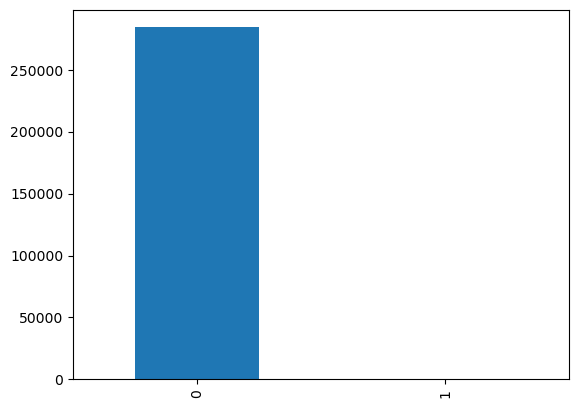

In [42]:
cred_df['Class'].value_counts().plot(kind='bar')

A very less number of fraud transactions are happened in data 

In [43]:
cred_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<Axes: ylabel='Class'>

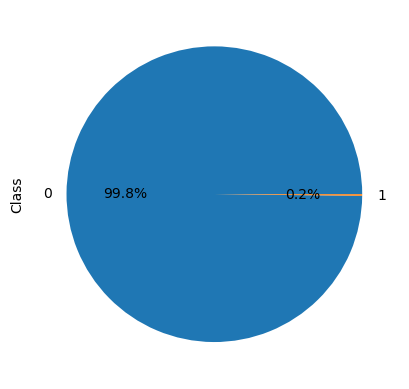

In [44]:
cred_df['Class'].value_counts().plot(kind='pie',autopct='%1.1f%%')

from the pie chart we an infere that 0.2% of fraud transaction had occured

### 8. Check the maximum and minimum fraudulent amount.

In [45]:
cred_df.groupby('Class')['Amount'].max()[1]

2125.87

In [46]:
cred_df.groupby('Class')['Amount'].min()

Class
0    0.0
1    0.0
Name: Amount, dtype: float64

The max fraudulent amount is 2125.87 bucks

### 9. Check the number of transactions where the transaction amount is zero and consider as a fraud transaction.

In [47]:
cred_df[(cred_df['Amount']==0.0) & (cred_df['Class']==1)].shape[0]

27

* There are 27 fraud transactions are recorded out of 492  where  transaction amount is zero

### 10. Check the distribution of columns. List down columns that are normally distributed. List down columns that are not normally distributed.

In [48]:
normal_dist=[]
not_normal=[]
for i in cred_df.columns:
    if cred_df[i].skew() in range(0,1):
        normal_dist.append(i)
    else:
        not_normal.append(i)
print('Normally distributed columns:',normal_dist)
print('Not Normlly distributed columns:', not_normal)

Normally distributed columns: []
Not Normlly distributed columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class', 'Time in hrs']


In [18]:
#Using Jarque bera

In [19]:
from scipy.stats import jarque_bera


In [49]:
nor=[]
notnor=[]
for i in cred_df.select_dtypes(np.number):
    stats,pvalue=jarque_bera(cred_df[i])
    if pvalue>0.05:
        nor.append(i)
    else:
        notnor.append(i)

In [50]:
print("The normally distributed columns are: ",nor)
print("The columns which are not normally distributed: ",notnor)

The normally distributed columns are:  []
The columns which are not normally distributed:  ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class', 'Time in hrs']


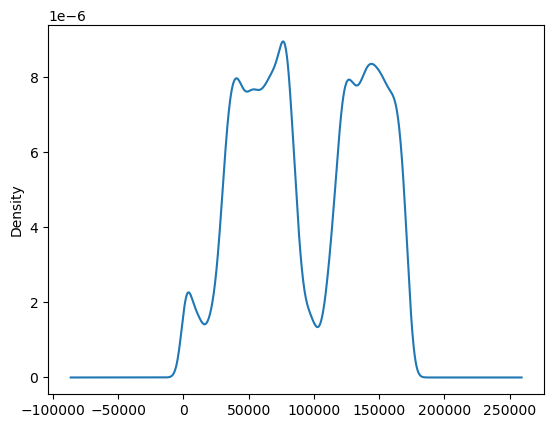

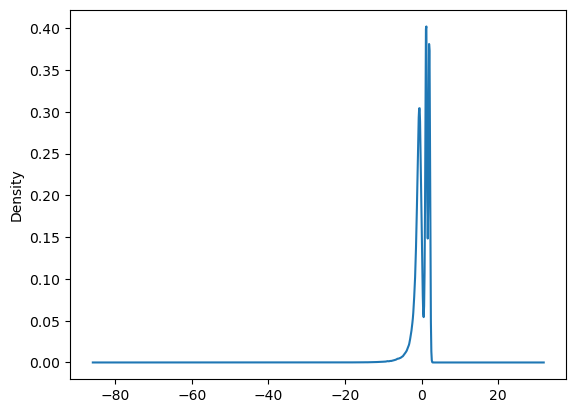

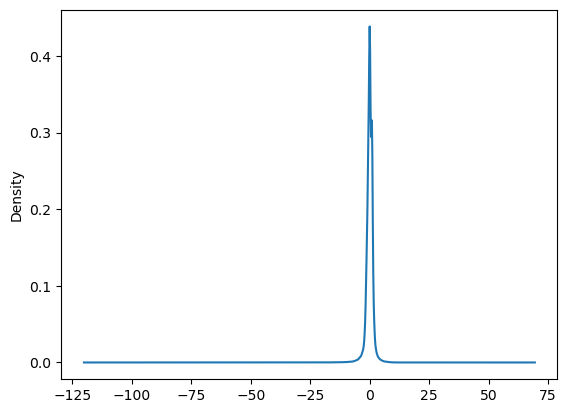

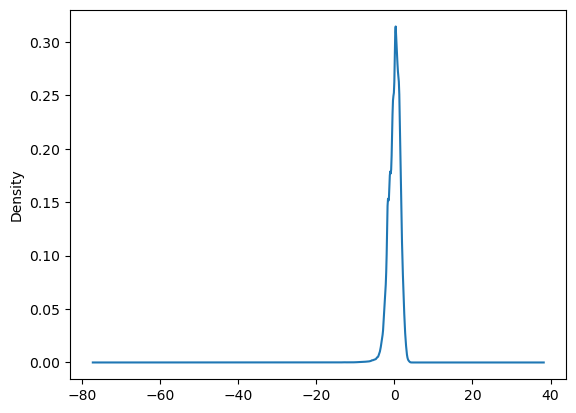

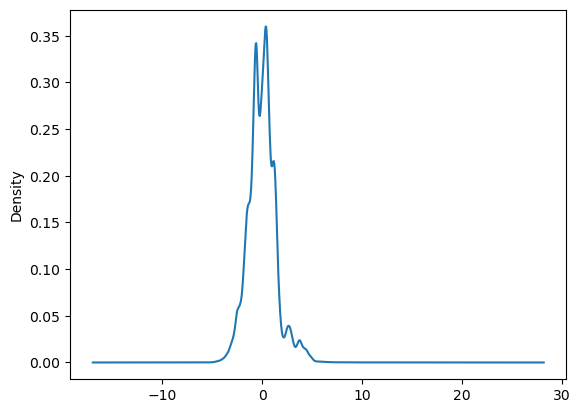

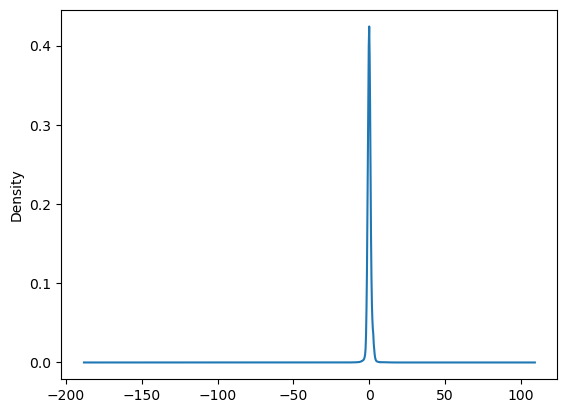

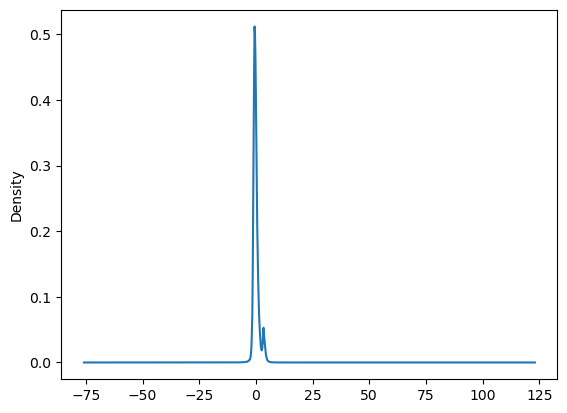

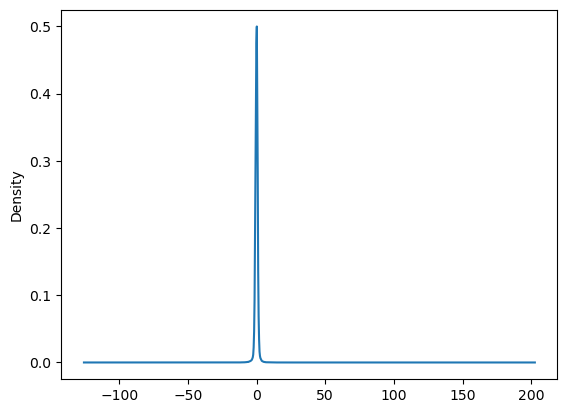

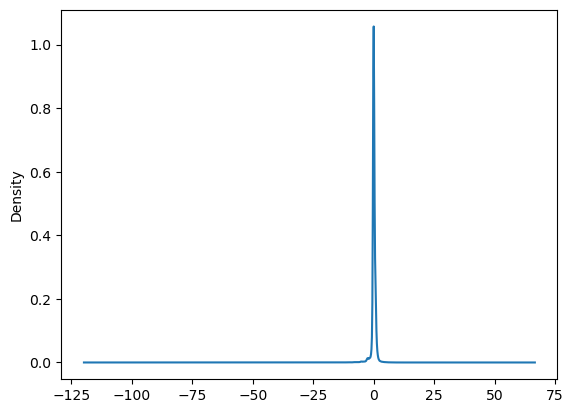

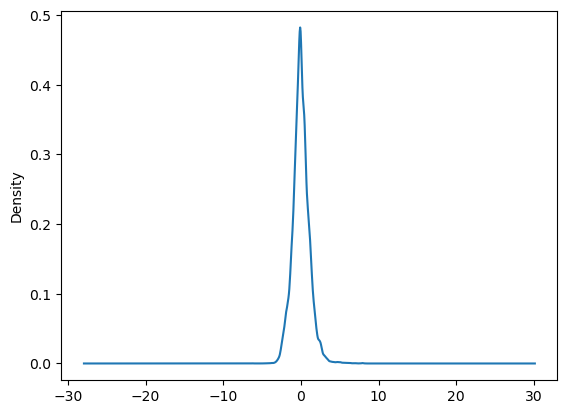

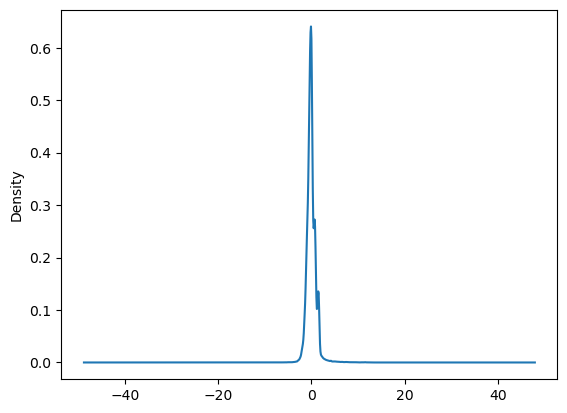

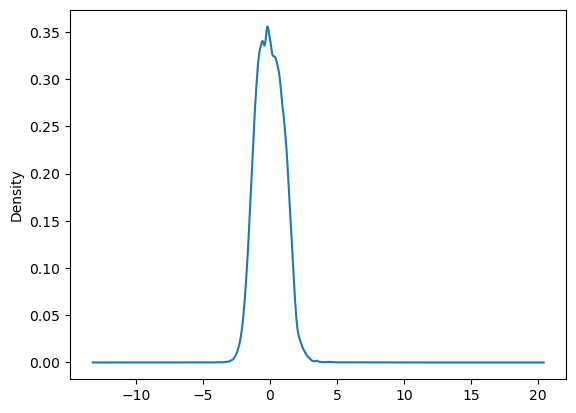

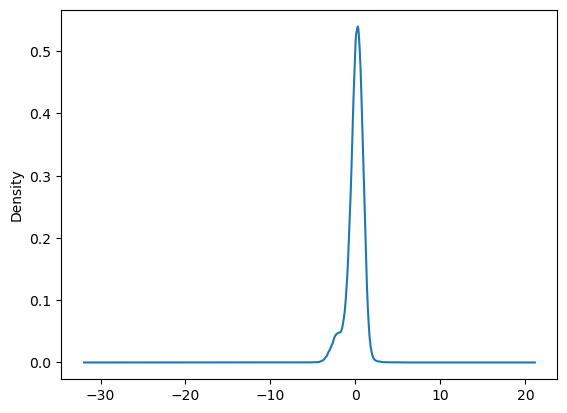

KeyboardInterrupt: 

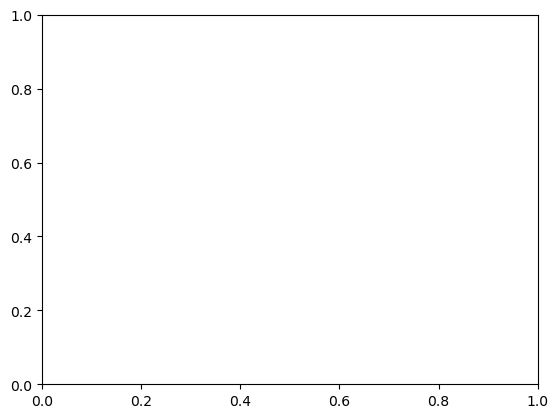

In [51]:
for i in cred_df.select_dtypes(include=np.number):
    cred_df[i].plot(kind='kde')
    plt.show()

### 11. List down columns that are highly skewed.

In [52]:
highskew=[]
for i in cred_df.select_dtypes(np.number):
    if cred_df[i].skew()>1:
        highskew.append(i)
        
highskew      

['V6', 'V7', 'V10', 'V21', 'V28', 'Amount', 'Class']

### 12. With the help of a standard scaler, normalize the respective column distribution.

In [24]:
from sklearn.preprocessing import StandardScaler


In [25]:
# for i in cred_df.drop('Class',axis=1).columns:
#     ss=StandardScaler()
#     cred_df[i]=ss.fit_transform(pd.DataFrame(cred_df[i]))

### 13. List down columns that have high kurtosis.

In [53]:
highkurt=[]
for i in cred_df.select_dtypes(np.number):
    if cred_df[i].kurt()>2:
        highkurt.append(i)
        
highkurt

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V12',
 'V14',
 'V16',
 'V17',
 'V18',
 'V20',
 'V21',
 'V22',
 'V23',
 'V25',
 'V27',
 'V28',
 'Amount',
 'Class']

### 14.What is the distribution of Time and Amount columns in the dataset ?

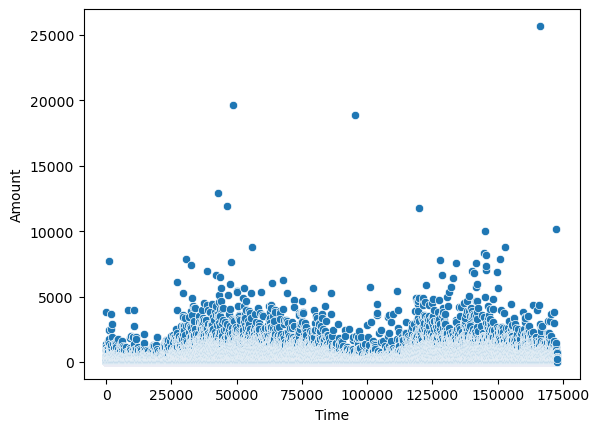

In [54]:
sns.scatterplot(data=cred_df,x='Time',y='Amount')
plt.show()

irrespective of time most of the amount falls in between 0 and 5000 bucks

### 15. Find the distribution of all variables with respect to the outcome ‘Class’ variable.

In [55]:
cred_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Time in hrs'],
      dtype='object')

In [56]:
cols=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

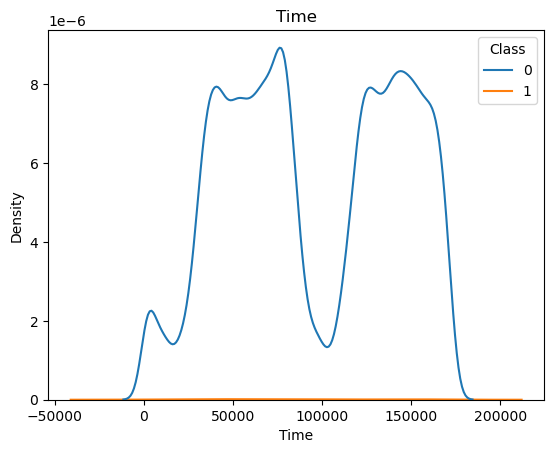

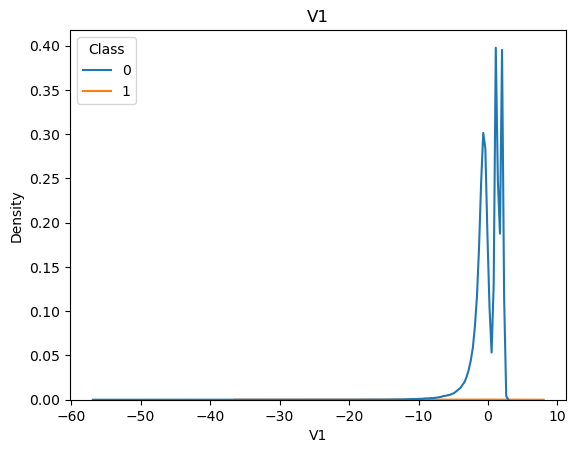

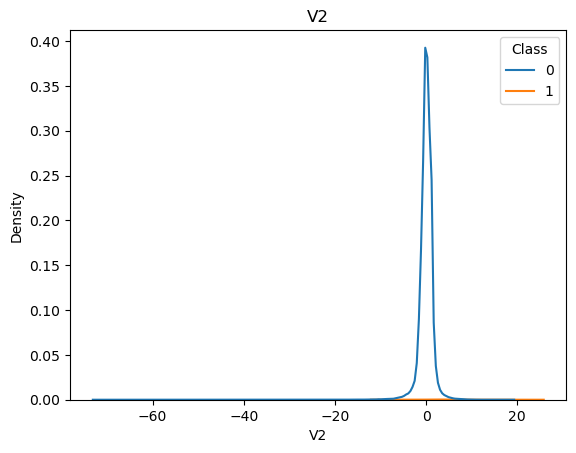

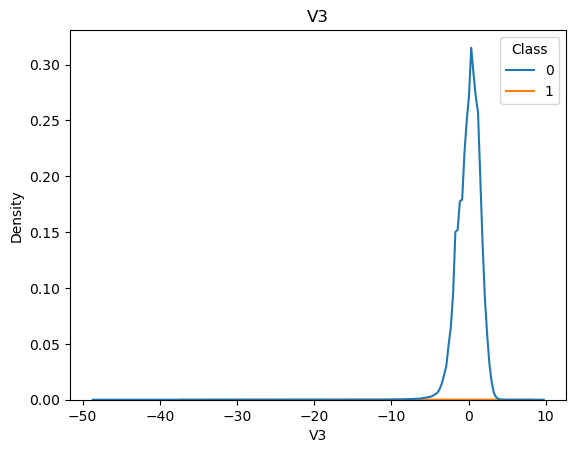

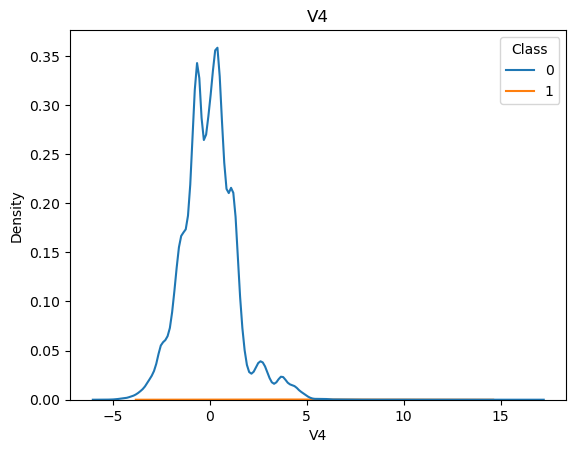

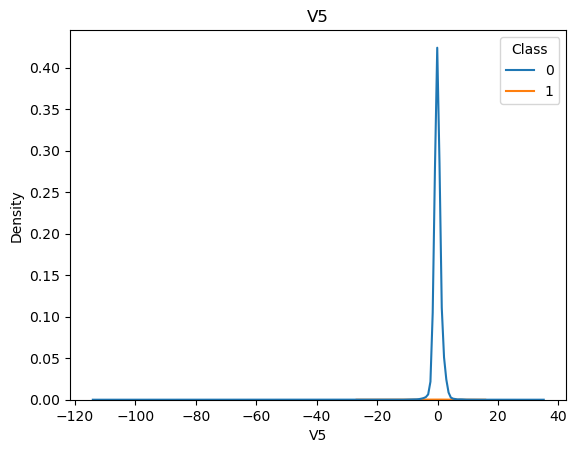

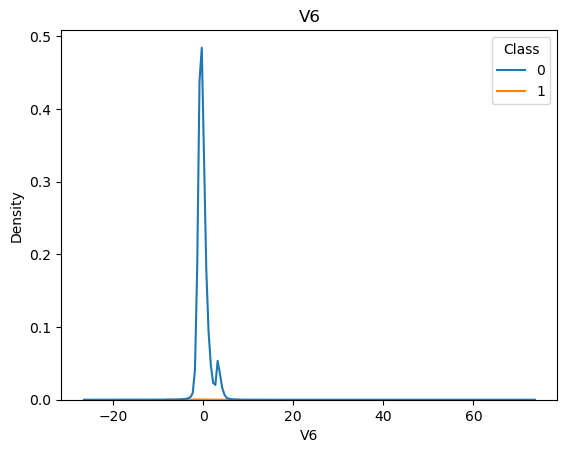

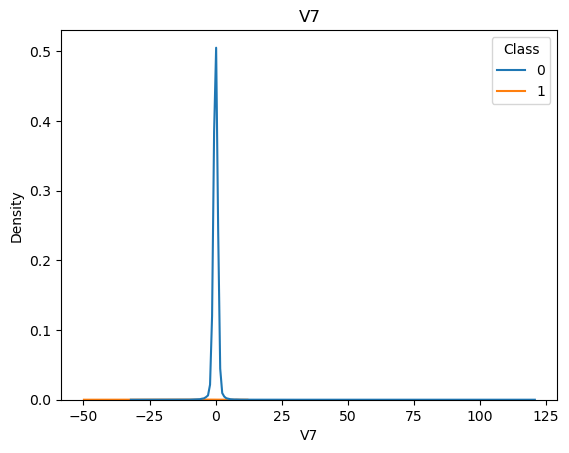

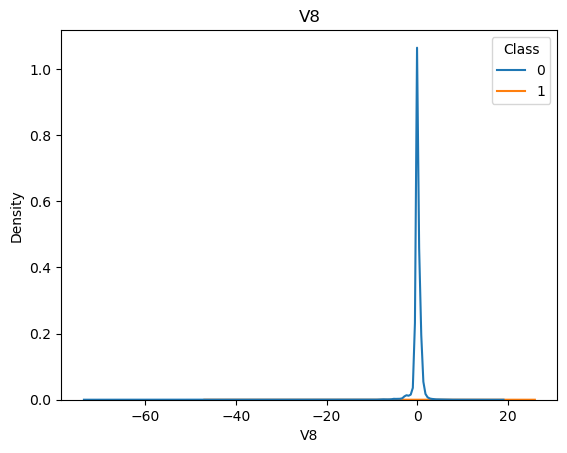

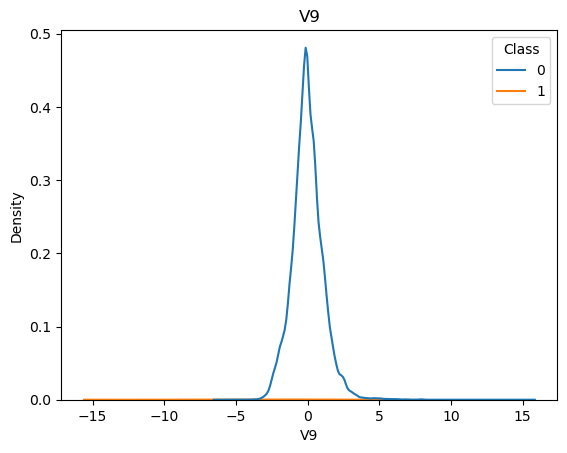

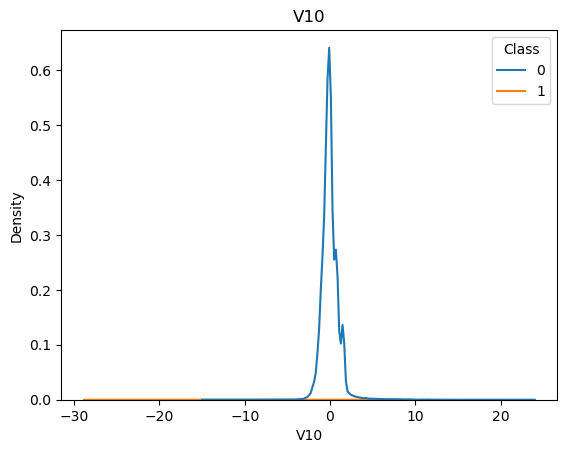

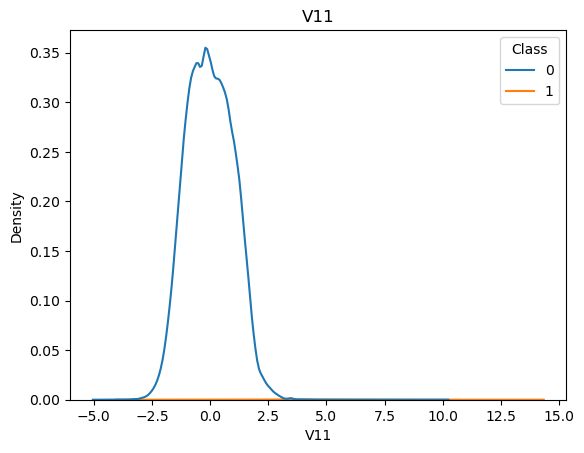

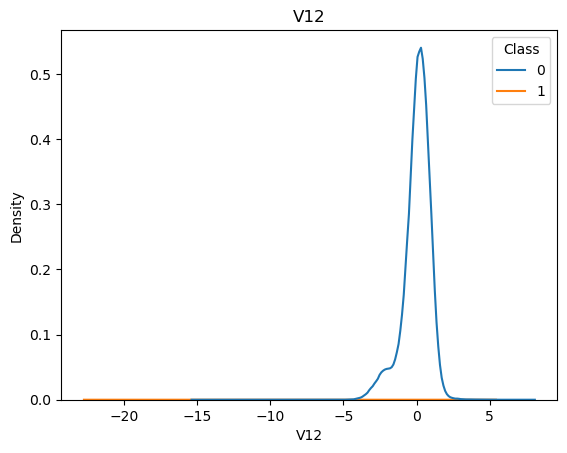

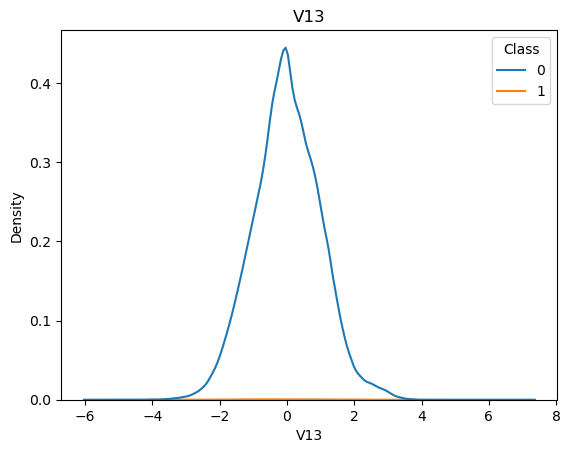

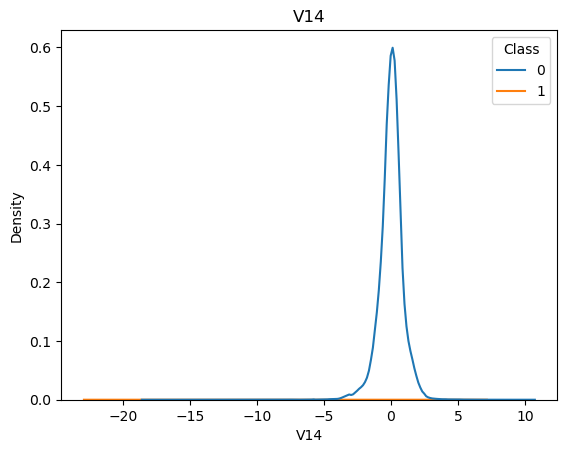

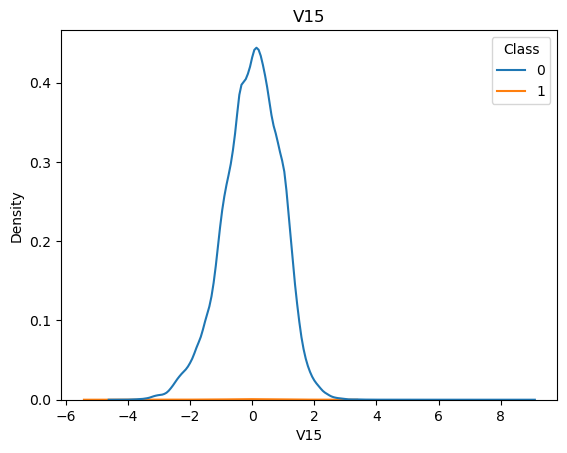

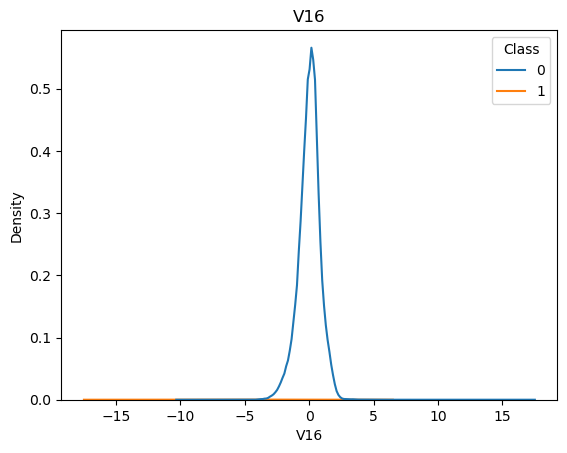

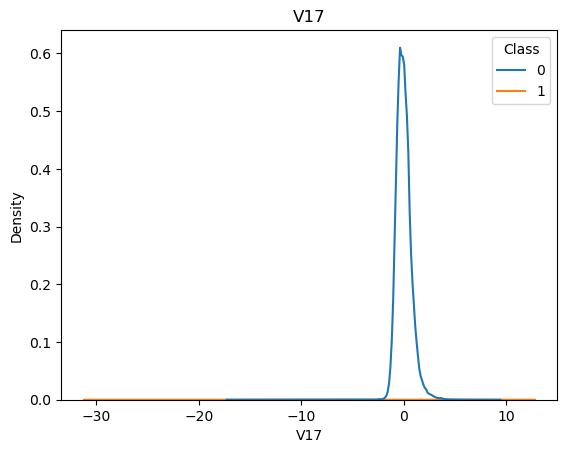

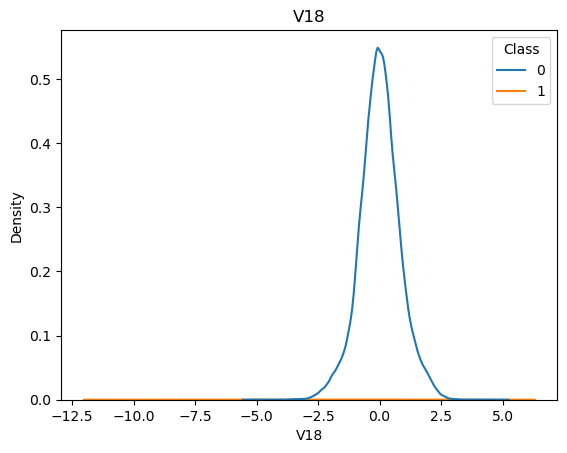

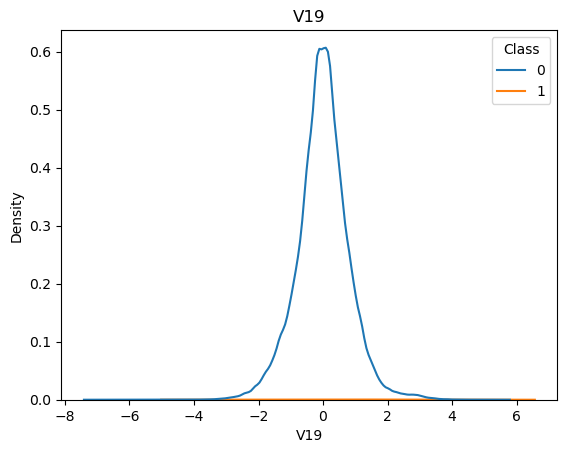

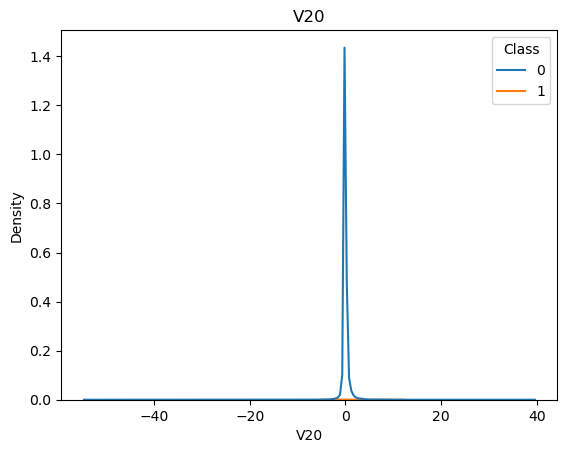

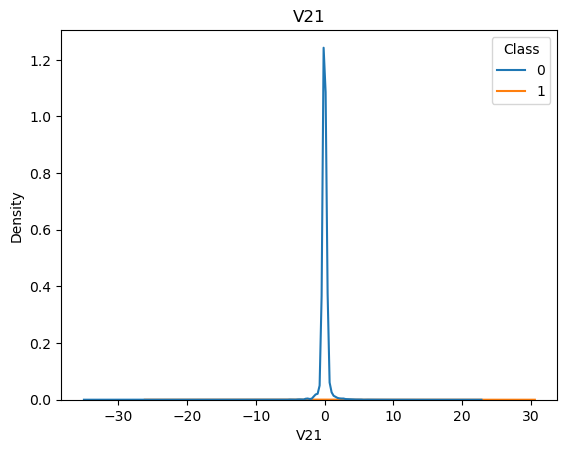

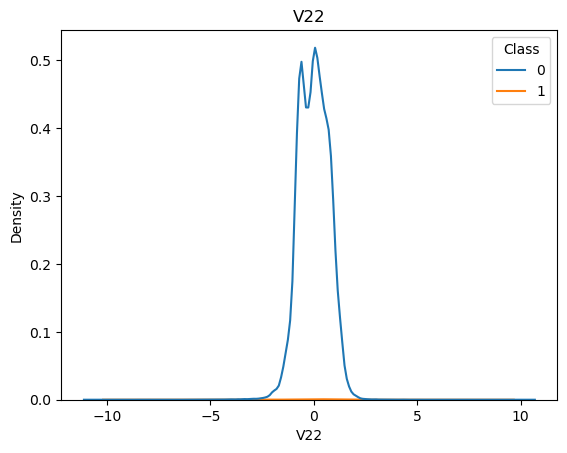

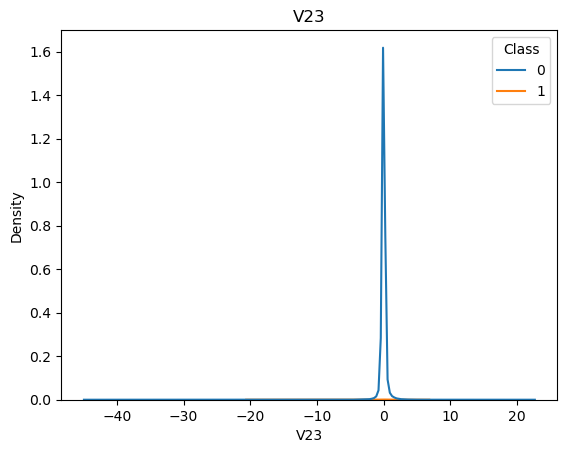

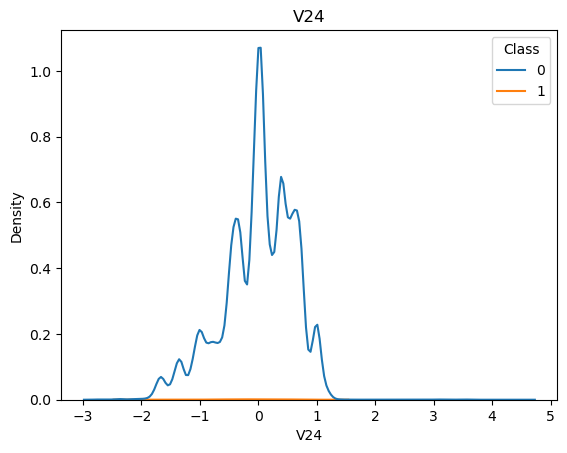

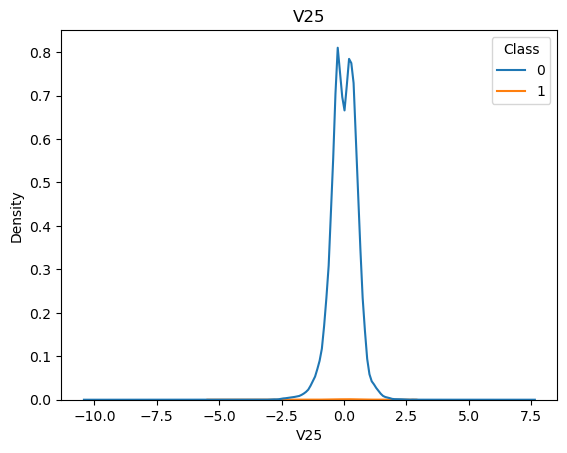

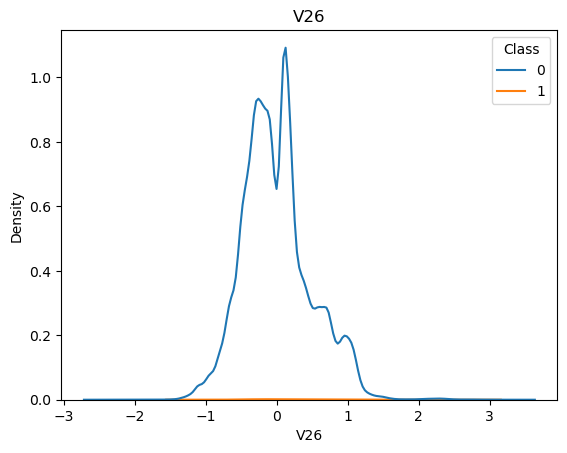

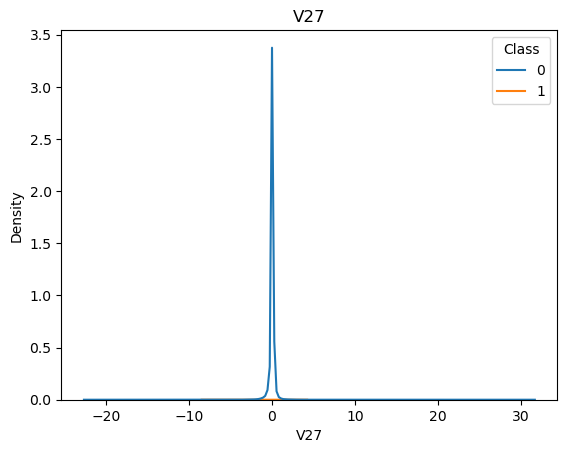

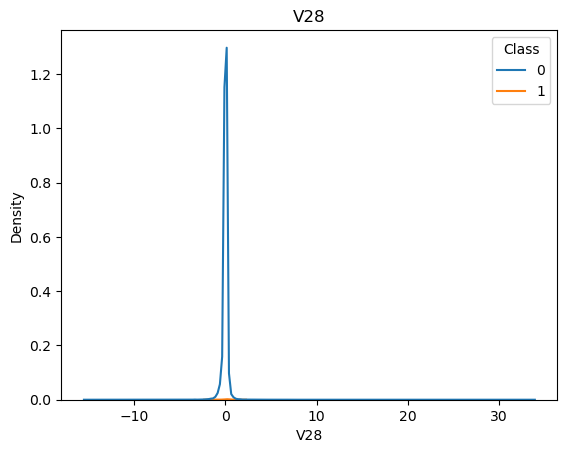

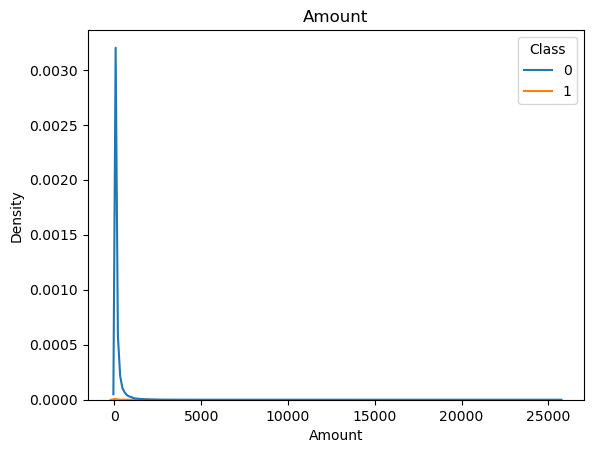

In [57]:
for i in cols:
    sns.kdeplot(x=cred_df[i],hue=cred_df['Class'])
    plt.title(i)
    plt.show()

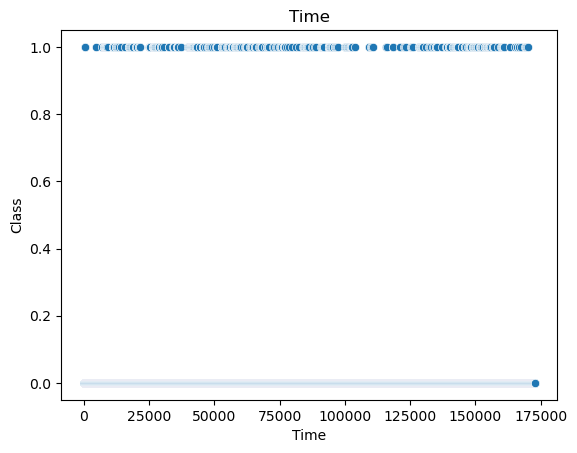

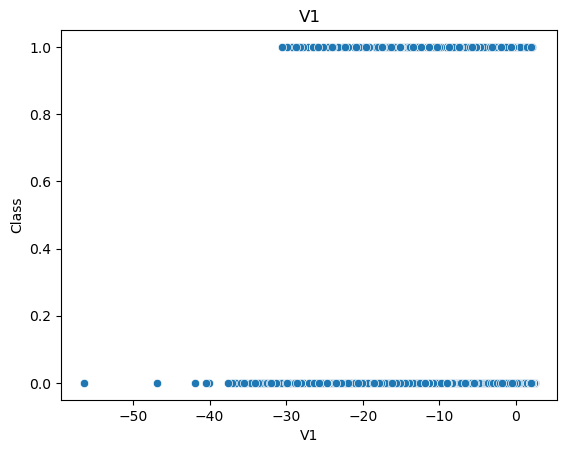

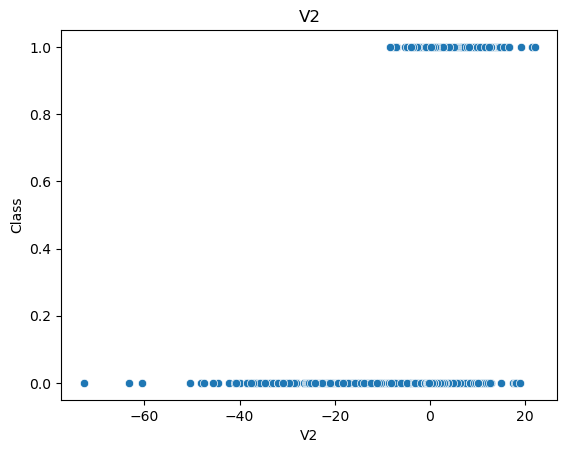

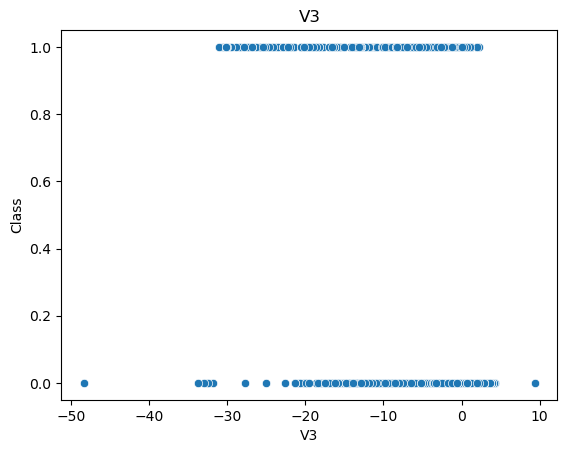

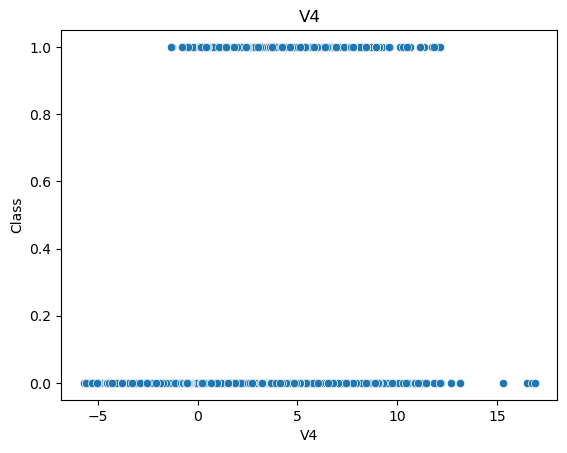

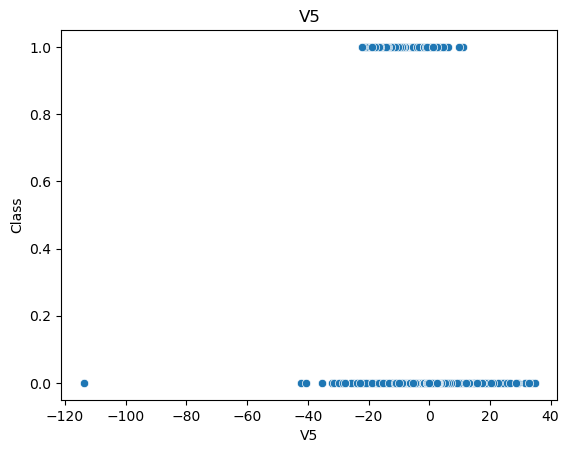

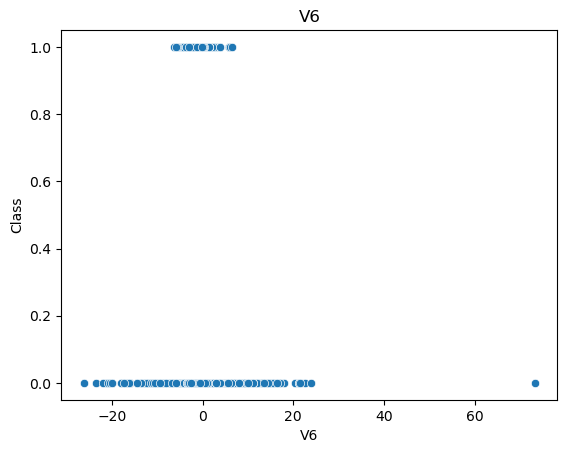

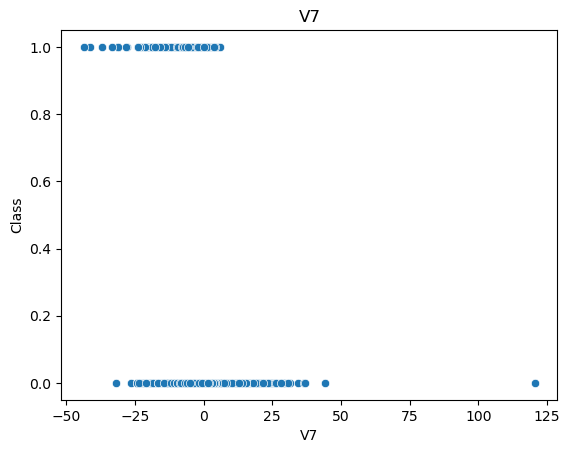

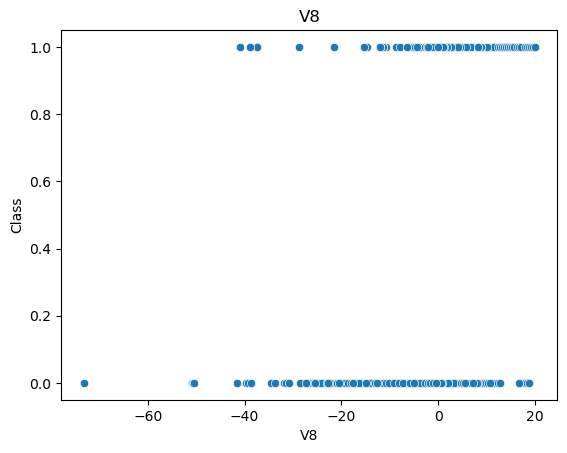

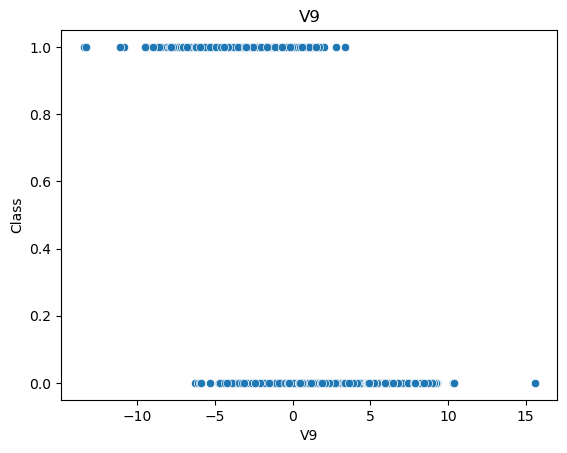

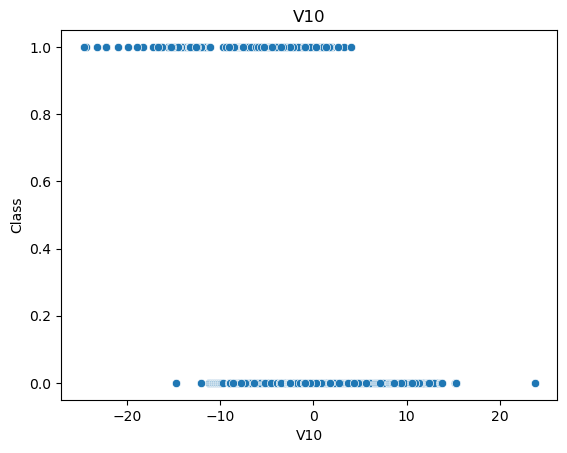

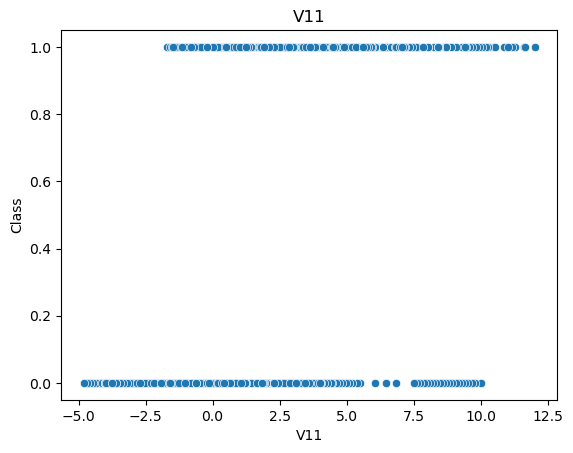

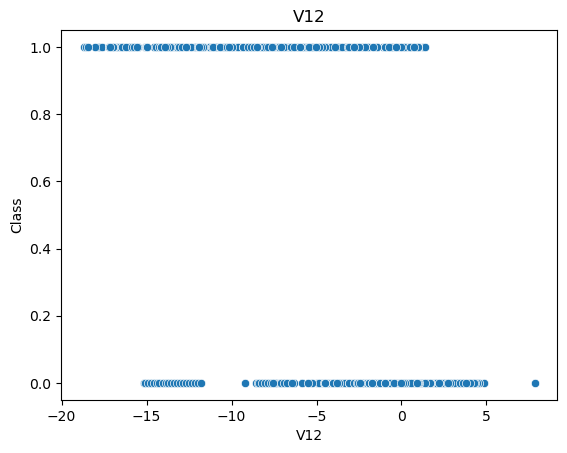

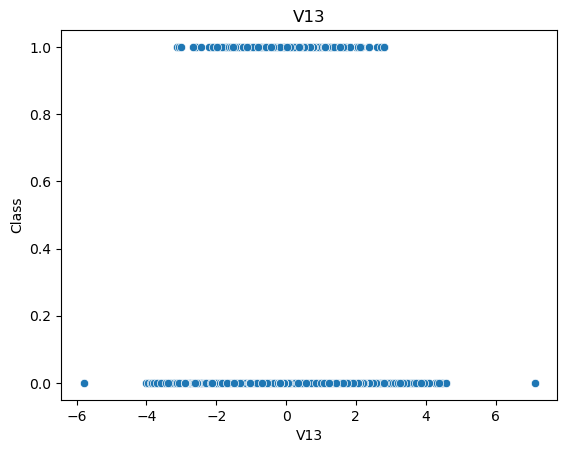

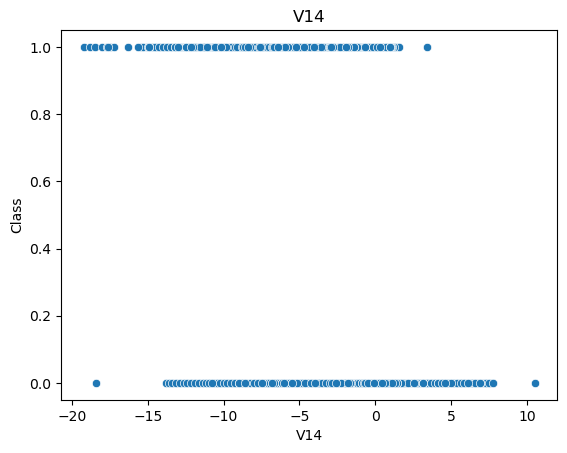

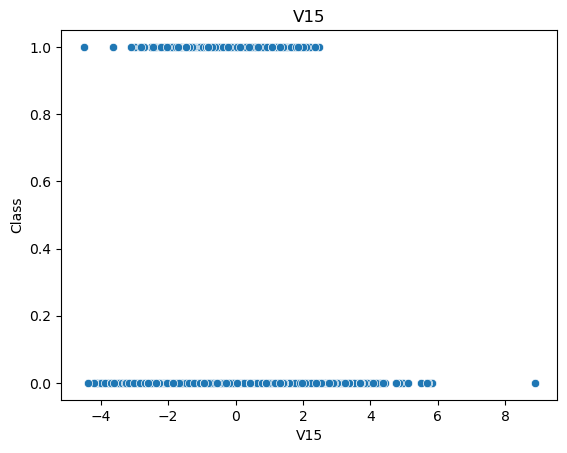

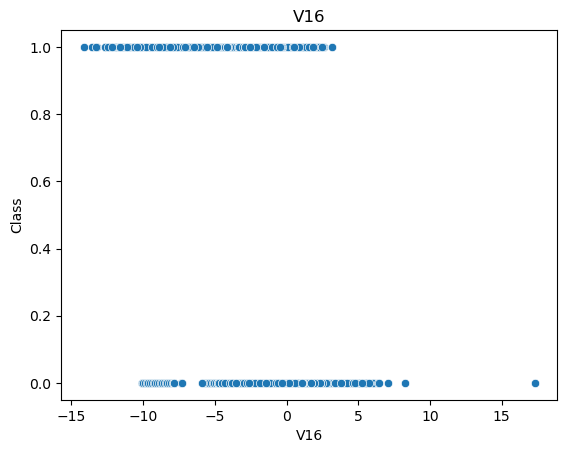

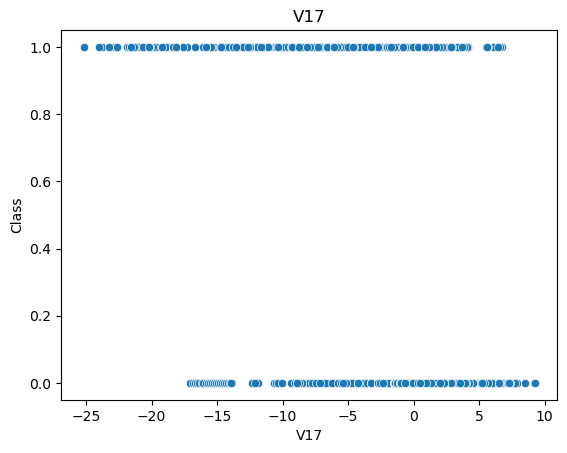

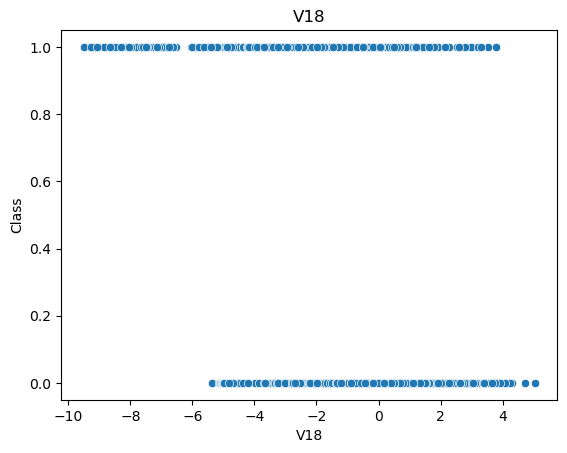

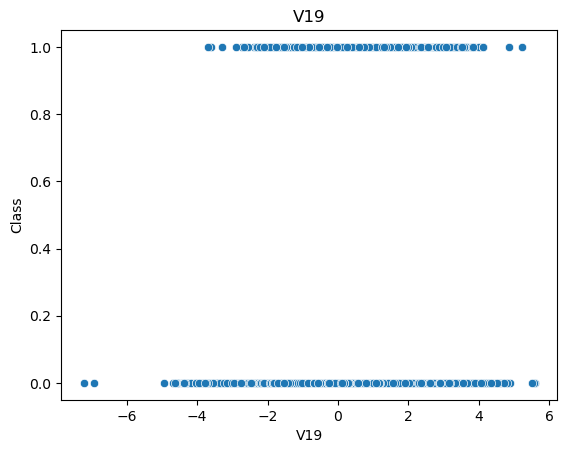

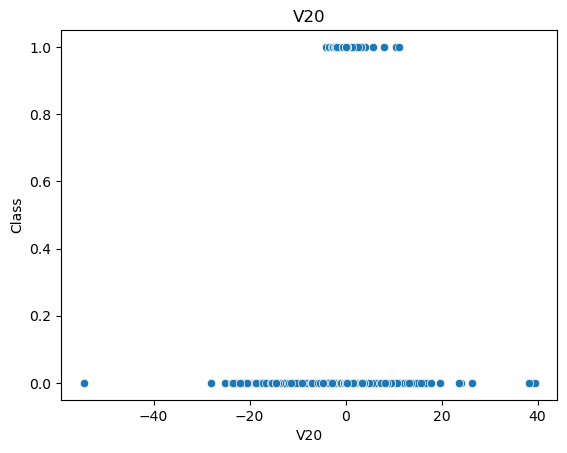

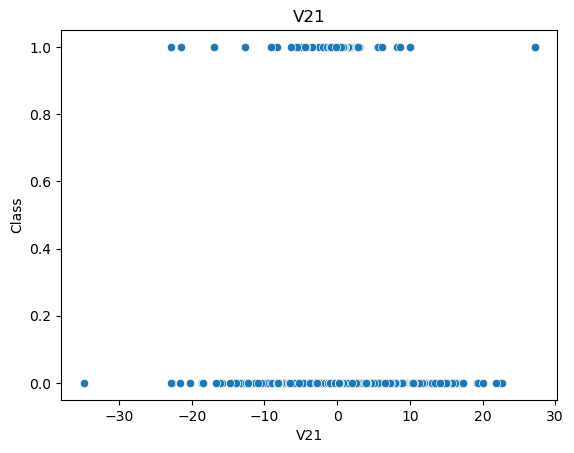

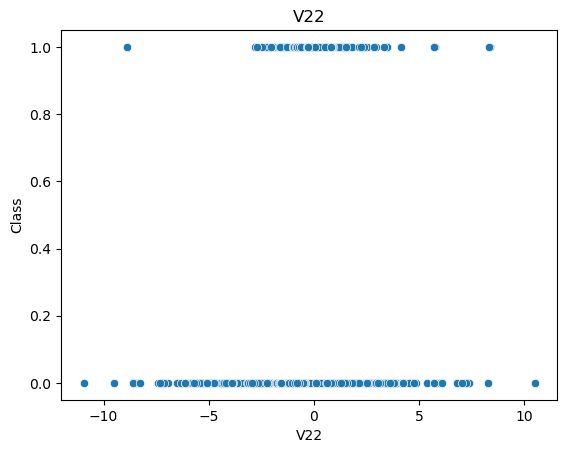

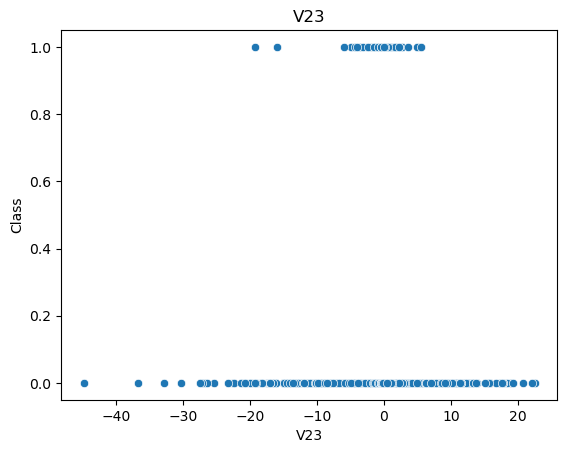

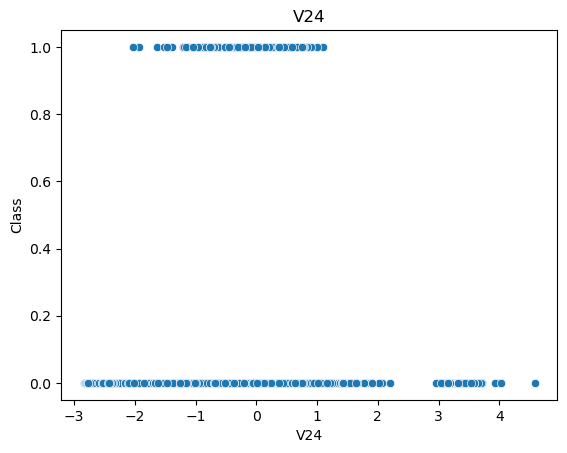

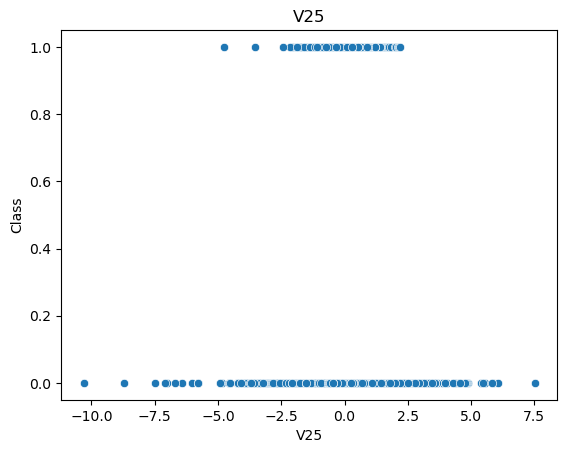

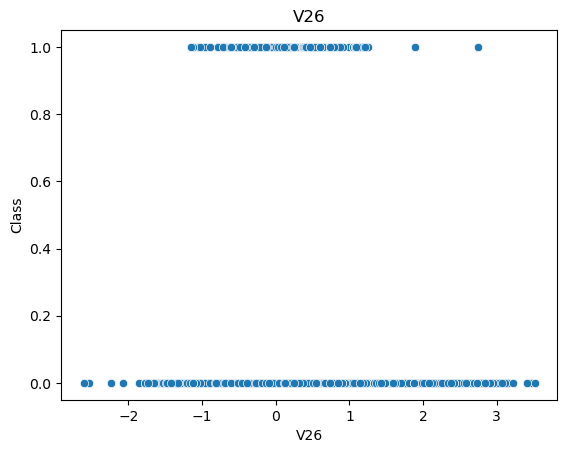

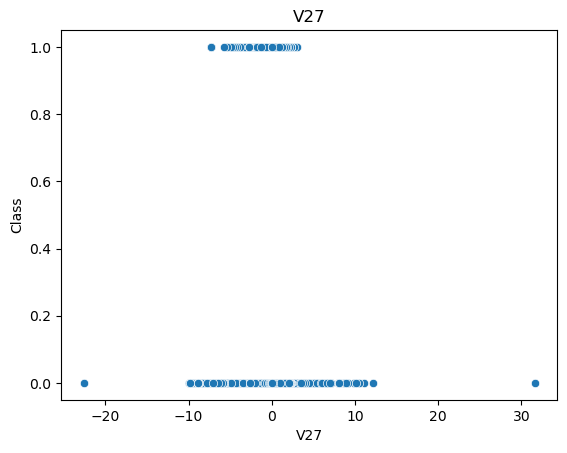

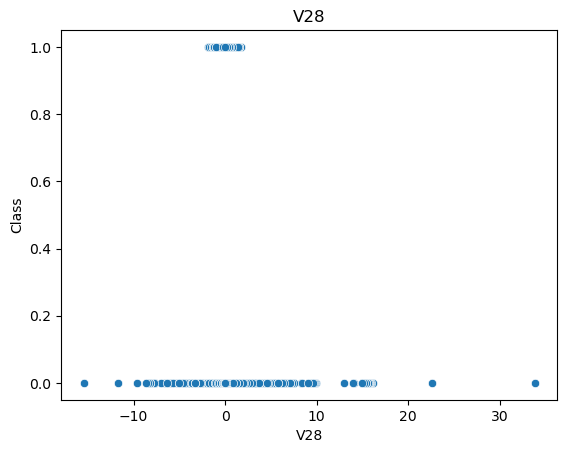

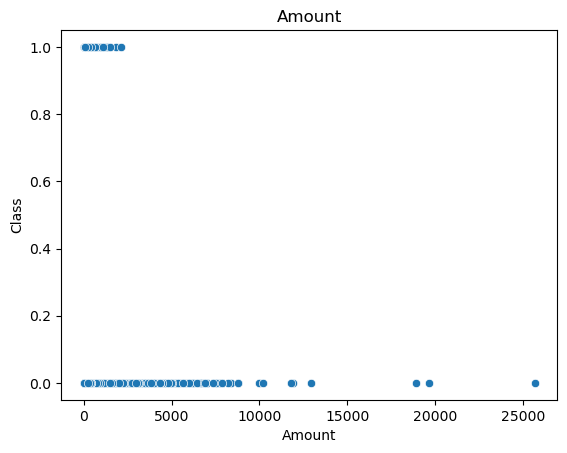

In [58]:
for i in cols:
    sns.scatterplot(y=cred_df[i],x=cred_df['Class'])
    plt.title(i)
    plt.show()

### 16. Create a countplot for the outcome class in seaborn using percentage instead of count for each bar.

<Axes: xlabel='Class', ylabel='count'>

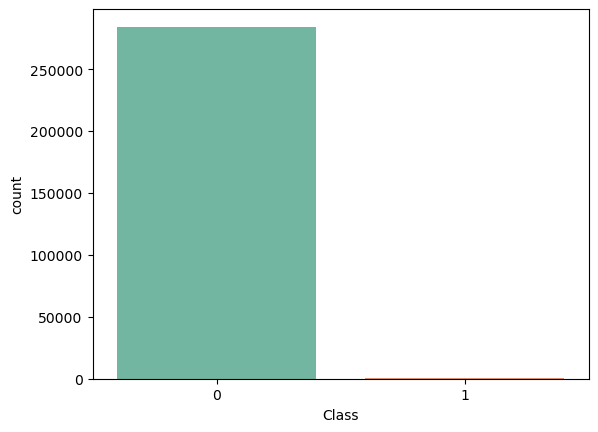

In [59]:
sns.countplot(x=cred_df['Class'],palette='Set2')

<Axes: >

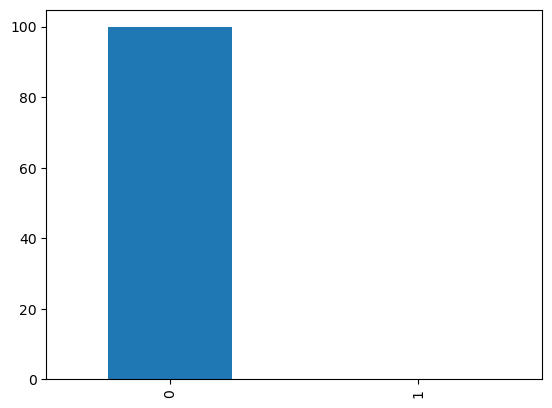

In [60]:
(cred_df['Class'].value_counts(normalize=True)*100).plot(kind='bar')

### 17. Plot a heatmap for correlation matrix for the given dataset. Write the Observation.
### Especially note down columns that are highly correlated (Positive and Negative Correlation, Consider 0.7 to 1 as high).

<Axes: >

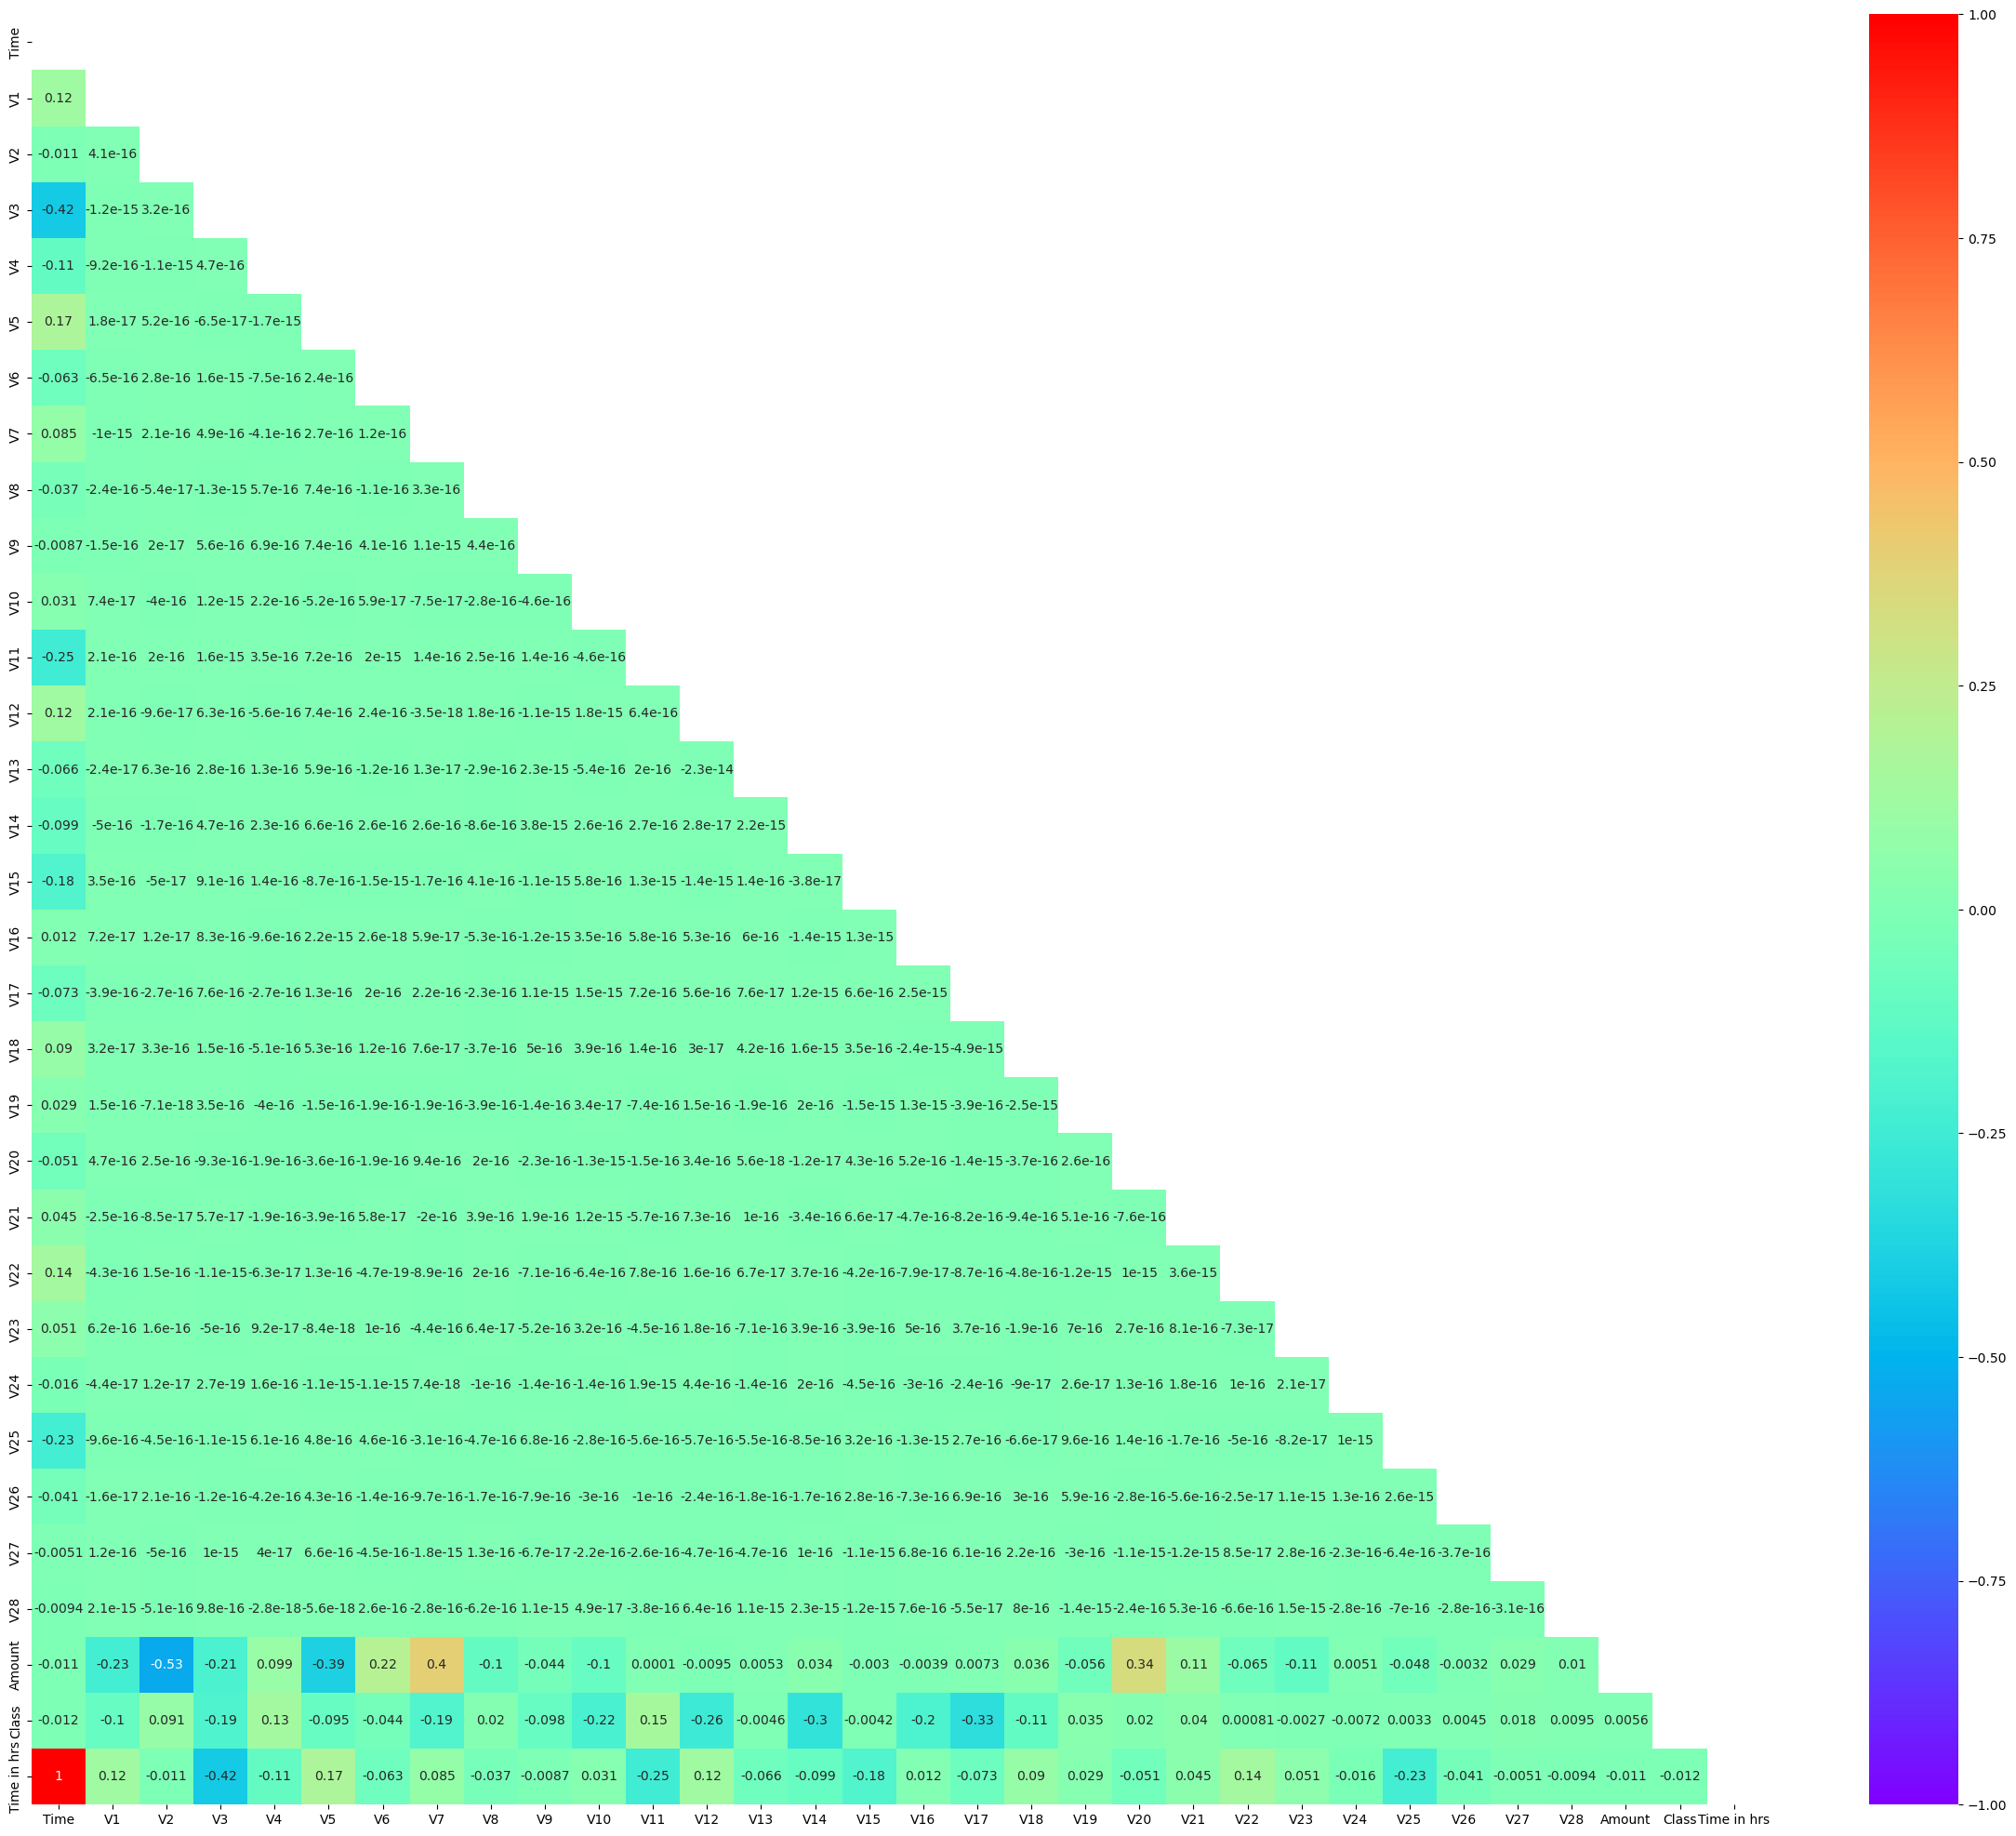

In [61]:
plt.figure(figsize=(30,25))
sns.heatmap(cred_df.corr(),annot=True,vmax=1,vmin=-1,cmap='rainbow',mask=np.triu(cred_df.corr()))

In [62]:
cred_df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time in hrs
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323,1.000000
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347,0.117396
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289,-0.010594
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961,-0.419618
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447,-0.105260
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974,0.173072
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643,-0.063016
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257,0.084714
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875,-0.036950
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733,-0.008660


### 18. With the help of hypothesis testing check whether fraudulent transactions of higher value than normal transactions?

* Ho: Fraudulent transactions mean are less than or equal to normal transactions mean
* H1: Fradulent transactions mean  are higher than normal transactions mean

In [65]:
fraudulent = cred_df[cred_df['Class'] == 1]['Amount']
normal = cred_df[cred_df['Class'] == 0]['Amount']

In [70]:
t_stat, p_value = stats.ttest_ind(fraudulent, normal, alternative='greater')
p_value

0.0013256103245958416

In [69]:
# Taking alpha value
if p_value < 0.05:
    print("Reject the null hypothesis: Fraudulent transactions have a higher mean amount than normal transactions.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean amount between fraudulent and normal transactions.")

Reject the null hypothesis: Fraudulent transactions have a higher mean amount than normal transactions.


# 19. Perform ANOVA test for Statistical feature selection.

In [81]:
cred_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time in hrs
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0


In [91]:
#V1
a=cred_df[cred_df['Class']==0]['V1']
b=cred_df[cred_df['Class']==1]['V1']
t_stat, p_value = stats.ttest_ind(a,b)
p_value

0.0

Since,p_value<0.05.We reject the null Hypthesis.
V1 and class are  related

In [92]:
#V2
a=cred_df[cred_df['Class']==0]['V2']
b=cred_df[cred_df['Class']==1]['V2']
t_stat, p_value = stats.ttest_ind(a,b)
p_value

0.0

Since,p_value<0.05.We reject the null Hypthesis. V2 and class are related

H0:V3 and Class are of equal mean(Not related)
H1:V3 and Class are not ofequal mean(Are related)

In [93]:
#V3
a=cred_df[cred_df['Class']==0]['V3']
b=cred_df[cred_df['Class']==1]['V3']
t_stat, p_value = stats.ttest_ind(a,b)
p_value

0.0

Since,p_value<0.05.We reject the null Hypthesis. V3 and class are related

In [94]:
#V4
a=cred_df[cred_df['Class']==0]['V4']
b=cred_df[cred_df['Class']==1]['V4']
t_stat, p_value = stats.ttest_ind(a,b)
p_value

0.0

Since,p_value<0.05.We reject the null Hypthesis. V4 and class are related

In [129]:
#V5
a=cred_df[cred_df['Class']==0]['V5']
b=cred_df[cred_df['Class']==1]['V5']
t_stat, p_value = stats.ttest_ind(a,b)
p_value

0.0

Since,p_value<0.05.We reject the null Hypthesis. V5 and class are  related

In [97]:
#V6
a=cred_df[cred_df['Class']==0]['V6']
b=cred_df[cred_df['Class']==1]['V6']
t_stat, p_value = stats.ttest_ind(a,b)
p_value

4.2131113453230875e-120

Since,p_value<0.05.We reject the null Hypthesis. V6 and class are related


In [100]:
#V7
a=cred_df[cred_df['Class']==0]['V7']
b=cred_df[cred_df['Class']==1]['V7']
t_stat, p_value = stats.ttest_ind(a,b)
p_value

0.0

Since,p_value<0.05.We reject the null Hypthesis. V7 and class are related

In [101]:
#V8
a=cred_df[cred_df['Class']==0]['V8']
b=cred_df[cred_df['Class']==1]['V8']
t_stat, p_value = stats.ttest_ind(a,b)
p_value

2.740673101247307e-26

Since,p_value<0.05.We reject the null Hypthesis. V8 and class are related

In [102]:
#V9
a=cred_df[cred_df['Class']==0]['V9']
b=cred_df[cred_df['Class']==1]['V9']
t_stat, p_value = stats.ttest_ind(a,b)
p_value

0.0

Since,p_value<0.05.We reject the null Hypthesis. V9 and class are related

In [106]:
#V10
a=cred_df[cred_df['Class']==0]['V10']
b=cred_df[cred_df['Class']==1]['V10']
t_stat, p_value = stats.ttest_ind(a,b)
p_value

0.0

Since,p_value<0.05.We reject the null Hypthesis. V10 and class are related

In [107]:
#V11
a=cred_df[cred_df['Class']==0]['V11']
b=cred_df[cred_df['Class']==1]['V11']
t_stat, p_value = stats.ttest_ind(a,b)
p_value

0.0

Since,p_value<0.05.We reject the null Hypthesis. V11 and class are related

In [108]:
#V12
a=cred_df[cred_df['Class']==0]['V12']
b=cred_df[cred_df['Class']==1]['V12']
t_stat, p_value = stats.ttest_ind(a,b)
p_value

0.0

Since,p_value<0.05.We reject the null Hypthesis. V12 and class are related

In [110]:
#V13
a=cred_df[cred_df['Class']==0]['V13']
b=cred_df[cred_df['Class']==1]['V13']
t_stat, p_value = stats.ttest_ind(a,b)
p_value

0.014737338961005653

Since,p_value<0.05.We reject the null Hypthesis. V13 and class are related

In [111]:
#V14
a=cred_df[cred_df['Class']==0]['V14']
b=cred_df[cred_df['Class']==1]['V14']
t_stat, p_value = stats.ttest_ind(a,b)
p_value

0.0

Since,p_value<0.05.We reject the null Hypthesis. V14 and class are related

In [112]:
#V15
a=cred_df[cred_df['Class']==0]['V15']
b=cred_df[cred_df['Class']==1]['V15']
t_stat, p_value = stats.ttest_ind(a,b)
p_value

0.02420142600145766

Since,p_value<0.05.We reject the null Hypthesis. V15 and class are related

In [113]:
#V16
a=cred_df[cred_df['Class']==0]['V16']
b=cred_df[cred_df['Class']==1]['V16']
t_stat, p_value = stats.ttest_ind(a,b)
p_value

0.0

Since,p_value<0.05.We reject the null Hypthesis. V16 and class are related

In [ ]:
H0:V17 and Class are of equal mean(Not related)
H1:V17 and Class are not ofequal mean(Are related)

In [114]:
#V17
a=cred_df[cred_df['Class']==0]['V17']
b=cred_df[cred_df['Class']==1]['V17']
t_stat, p_value = stats.ttest_ind(a,b)
p_value

0.0

Since,p_value<0.05.We reject the null Hypthesis. V17 and class are related

In [115]:
#V18
a=cred_df[cred_df['Class']==0]['V18']
b=cred_df[cred_df['Class']==1]['V18']
t_stat, p_value = stats.ttest_ind(a,b)
p_value

0.0

Since,p_value<0.05.We reject the null Hypthesis. V18 and class are related

In [117]:
#V19
a=cred_df[cred_df['Class']==0]['V19']
b=cred_df[cred_df['Class']==1]['V19']
t_stat, p_value = stats.ttest_ind(a,b)
p_value

5.801517302142051e-77

Since,p_value<0.05.We reject the null Hypthesis. V19 and class are related

In [118]:
#V20
a=cred_df[cred_df['Class']==0]['V20']
b=cred_df[cred_df['Class']==1]['V20']
t_stat, p_value = stats.ttest_ind(a,b)
p_value

7.964292023532662e-27

Since,p_value<0.05.We reject the null Hypthesis. V20 and class are related

In [119]:
#V21
a=cred_df[cred_df['Class']==0]['V21']
b=cred_df[cred_df['Class']==1]['V21']
t_stat, p_value = stats.ttest_ind(a,b)
p_value

3.002268557849154e-103

Since,p_value<0.05.We reject the null Hypthesis. V21 and class are related

H0:V22 and Class are of equal mean(Not related)
H1:V22 and Class are not ofequal mean(Are related)

In [120]:
#V22
a=cred_df[cred_df['Class']==0]['V22']
b=cred_df[cred_df['Class']==1]['V22']
t_stat, p_value = stats.ttest_ind(a,b)
p_value

0.667359691392515

Since,p_value>0.05.We fail to reject the null Hypthesis. V22 and class are not related

In [121]:
#V23
a=cred_df[cred_df['Class']==0]['V23']
b=cred_df[cred_df['Class']==1]['V23']
t_stat, p_value = stats.ttest_ind(a,b)
p_value

0.1518601985214213

Since,p_value>0.05.We fail to reject the null Hypthesis. V23 and class are not related

In [122]:
#V24
a=cred_df[cred_df['Class']==0]['V24']
b=cred_df[cred_df['Class']==1]['V24']
t_stat, p_value = stats.ttest_ind(a,b)
p_value

0.0001163760280885243

Since,p_value<0.05.We reject the null Hypthesis. V24 and class are related

In [123]:
#V25
a=cred_df[cred_df['Class']==0]['V25']
b=cred_df[cred_df['Class']==1]['V25']
t_stat, p_value = stats.ttest_ind(a,b)
p_value

0.0775250093814013

Since,p_value>0.05.We fail to reject the null Hypthesis. V24 and class are not related

H0:V26 and Class are of equal mean(Not related)
H1:V26 and Class are not ofequal mean(Are related)

In [124]:
#V26
a=cred_df[cred_df['Class']==0]['V26']
b=cred_df[cred_df['Class']==1]['V26']
t_stat, p_value = stats.ttest_ind(a,b)
p_value

0.01741970537124198

Since,p_value<0.05.We reject the null Hypthesis. V26 and class are related

H0:V27 and Class are of equal mean(Not related)
H1:V27 and Class are not ofequal mean(Are related)

In [125]:
#V27
a=cred_df[cred_df['Class']==0]['V27']
b=cred_df[cred_df['Class']==1]['V27']
t_stat, p_value = stats.ttest_ind(a,b)
p_value

6.4419203436715095e-21

Since,p_value<0.05.We reject the null Hypthesis. V27 and class are related

In [127]:
#V28
a=cred_df[cred_df['Class']==0]['V28']
b=cred_df[cred_df['Class']==1]['V28']
t_stat, p_value = stats.ttest_ind(a,b)
p_value

3.5953535619896607e-07

Since,p_value<0.05.We reject the null Hypthesis. V28 and class are related



In [128]:
#Amount
a=cred_df[cred_df['Class']==0]['Amount']
b=cred_df[cred_df['Class']==1]['Amount']
t_stat, p_value = stats.ttest_ind(a,b)
p_value

0.002651220649191683

Since,p_value<0.05.We reject the null Hypthesis. Amount and class are related

### 20. Split the dataset randomly into train and test datasets. Use a train -test ratio of 70:30 ratio.

In [130]:
x=cred_df.drop(columns=['Class'])
y=cred_df['Class']

In [131]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,train_size=0.7,test_size=0.3)

In [132]:
x_train.shape[0]/cred_df.shape[0]

0.6999968399653098

### 21. These are just checkpoints. Please use your best analytical approach to build this report. You can mix match columns to create new ones which can be 

**What is the shape and size of the dataset?**

In [133]:
cred_df.shape

(284807, 32)

In [134]:
cred_df.size

9113824

In [135]:
cred_df.skew()

Time           -0.035568
V1             -3.280667
V2             -4.624866
V3             -2.240155
V4              0.676292
V5             -2.425901
V6              1.826581
V7              2.553907
V8             -8.521944
V9              0.554680
V10             1.187141
V11             0.356506
V12            -2.278401
V13             0.065233
V14            -1.995176
V15            -0.308423
V16            -1.100966
V17            -3.844914
V18            -0.259880
V19             0.109192
V20            -2.037155
V21             3.592991
V22            -0.213258
V23            -5.875140
V24            -0.552499
V25            -0.415793
V26             0.576693
V27            -1.170209
V28            11.192091
Amount         16.977724
Class          23.997579
Time in hrs    -0.035567
dtype: float64

The columns V7,Amount,Class,V28,V21 are highly skewed

**Which columns are highly Kurtosis driven?**

In [141]:
for i in cred_df.columns:
    if cred_df[i].kurt()>3:
        print(i)

V1
V2
V3
V5
V6
V7
V8
V9
V10
V12
V14
V16
V17
V20
V21
V23
V25
V27
V28
Amount
Class


**Which columns have Wrong data type?**

In [78]:
cred_df.dtypes

Time           float64
V1             float64
V2             float64
V3             float64
V4             float64
V5             float64
V6             float64
V7             float64
V8             float64
V9             float64
V10            float64
V11            float64
V12            float64
V13            float64
V14            float64
V15            float64
V16            float64
V17            float64
V18            float64
V19            float64
V20            float64
V21            float64
V22            float64
V23            float64
V24            float64
V25            float64
V26            float64
V27            float64
V28            float64
Amount         float64
Class            int64
Time in hrs    float64
dtype: object

No columns are having wrong dtypes

**What columns have missing values? (Check the Missing Values section in Pandas Profiling)**

In [79]:
cred_df.isna().sum()

Time           0
V1             0
V2             0
V3             0
V4             0
V5             0
V6             0
V7             0
V8             0
V9             0
V10            0
V11            0
V12            0
V13            0
V14            0
V15            0
V16            0
V17            0
V18            0
V19            0
V20            0
V21            0
V22            0
V23            0
V24            0
V25            0
V26            0
V27            0
V28            0
Amount         0
Class          0
Time in hrs    0
dtype: int64

no missing values

**What columns seem to have outliers based on min, max and percentile values, IQR range along with the standard deviation and mean absolute deviation?**

In [152]:
#Outliers based on Min max values
for column_name in cred_df.columns:
    
    threshold_multiplier = 2
    min_value = cred_df[column_name].min()
    max_value = cred_df[column_name].max()
    data_range = max_value - min_value
    threshold = threshold_multiplier * data_range
    outliers_below = cred_df[cred_df[column_name] < min_value - threshold]
    outliers_above = cred_df[cred_df[column_name] > max_value + threshold]
    print("\n")
    print("-------------------------------------------------------------------------")
    print(f"Potential outliers below the minimum value for {column_name}:")
    print(outliers_below)
    print(f"\nPotential outliers above the maximum value for {column_name}:")
    print(outliers_above)



-------------------------------------------------------------------------
Potential outliers below the minimum value for Time:
Empty DataFrame
Columns: [Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class, Time in hrs]
Index: []

[0 rows x 32 columns]

Potential outliers above the maximum value for Time:
Empty DataFrame
Columns: [Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class, Time in hrs]
Index: []

[0 rows x 32 columns]


-------------------------------------------------------------------------
Potential outliers below the minimum value for V1:
Empty DataFrame
Columns: [Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class, Time in hrs]
Index: []

[0 rows x 32 columns]

Potential outlier



-------------------------------------------------------------------------
Potential outliers below the minimum value for V25:
Empty DataFrame
Columns: [Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class, Time in hrs]
Index: []

[0 rows x 32 columns]

Potential outliers above the maximum value for V25:
Empty DataFrame
Columns: [Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class, Time in hrs]
Index: []

[0 rows x 32 columns]


-------------------------------------------------------------------------
Potential outliers below the minimum value for V26:
Empty DataFrame
Columns: [Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class, Time in hrs]
Index: []

[0 rows x 32 columns]

Potential outliers

In [154]:
#Outliers based on percentile values
for column_name in cred_df.columns:
    lower_percentile=0.25
    upper_percentile=0.75
    q1 = np.percentile(cred_df[column_name], lower_percentile)
    q3 = np.percentile(cred_df[column_name], upper_percentile)
    iqr = q3 - q1

    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr

    outliers = np.where((cred_df[column_name] < lower_bound) | (cred_df[column_name] > upper_bound))[0]
    print("\n")
    print("___________________________________________________________________________")
    print(f"The outliers for the column{column_name} is {outliers}")



___________________________________________________________________________
The outliers for the columnTime is [156345 156346 156347 ... 284804 284805 284806]


___________________________________________________________________________
The outliers for the columnV1 is []


___________________________________________________________________________
The outliers for the columnV2 is []


___________________________________________________________________________
The outliers for the columnV3 is []


___________________________________________________________________________
The outliers for the columnV4 is []


___________________________________________________________________________
The outliers for the columnV5 is []


___________________________________________________________________________
The outliers for the columnV6 is []


___________________________________________________________________________
The outliers for the columnV7 is []


_______________________________________

In [157]:
import numpy as np
from scipy.stats import zscore

In [161]:
#Outliers based on standard deviation values
for column_name in cred_df.columns:
    mean_value = np.mean(cred_df[column_name])
    std_dev = np.std(cred_df[column_name])
    z_scores = zscore(cred_df[column_name])
    threshold = 3
    outliers = np.where(np.abs(z_scores) > threshold)[0]
    print("\n")
    print("_______________________________________________________________________")
    print(f"Outliers of {column_name}:", outliers)



_______________________________________________________________________
Outliers of Time: []


_______________________________________________________________________
Outliers of V1: [   164   1158   1632 ... 284772 284795 284802]


_______________________________________________________________________
Outliers of V2: [    18    164    210 ... 284649 284795 284802]


_______________________________________________________________________
Outliers of V3: [   164   1632   5966 ... 284649 284795 284802]


_______________________________________________________________________
Outliers of V4: [    83    351    608 ... 284711 284712 284782]


_______________________________________________________________________
Outliers of V5: [    51    140    210 ... 284649 284795 284802]


_______________________________________________________________________
Outliers of V6: [    51    150    164 ... 284680 284762 284799]


_______________________________________________________________________
Out



_______________________________________________________________________
Outliers of V28: [     7     82    132 ... 284448 284649 284795]


_______________________________________________________________________
Outliers of Amount: [    51     89    140 ... 284383 284497 284528]


_______________________________________________________________________
Outliers of Class: [   541    623   4920   6108   6329   6331   6334   6336   6338   6427
   6446   6472   6529   6609   6641   6717   6719   6734   6774   6820
   6870   6882   6899   6903   6971   8296   8312   8335   8615   8617
   8842   8845   8972   9035   9179   9252   9487   9509  10204  10484
  10497  10498  10568  10630  10690  10801  10891  10897  11343  11710
  11841  11880  12070  12108  12261  12369  14104  14170  14197  14211
  14338  15166  15204  15225  15451  15476  15506  15539  15566  15736
  15751  15781  15810  16415  16780  16863  17317  17366  17407  17453
  17480  18466  18472  18773  18809  20198  23308  23422  

In [163]:
#Outliers based on mean absolute deviation
def mad(data):
    median = np.median(data)
    mad_values = np.abs(data - median)
    mad_threshold = 2.0  
    mad_score = mad_threshold * np.median(mad_values)
    return mad_score

def identify_outliers(data, threshold):
    mad_score = mad(data)
    outliers =[np.abs(data - np.median(data)) > mad_score]
    return outliers

In [170]:
for i in cred_df.columns:
    
    outliers = cred_df[identify_outliers(cred_df[i], threshold=2.0)]
    print("\n")
    print("_______________________________________________________")
    print(f"Outliers of {i} are:", outliers)



_______________________________________________________
Outliers of Time are:             Time         V1         V2        V3        V4        V5  \
281239  170025.0  -1.386212   0.362365 -1.626918 -0.710214  3.845885   
281240  170026.0  -0.345663  -0.049216 -1.101719 -1.351312  0.641171   
281241  170026.0   2.041512  -0.095918 -1.141756  0.393640 -0.075885   
281242  170027.0   2.112732  -0.046095 -1.347481  0.250802  0.218223   
281243  170027.0  -4.317924   3.947896 -3.740316 -1.901634 -0.250011   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...    

Outliers of V3 are:             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
15          12.0  -0.752417   0.345485  2.057323 -1.468643 -1.158394   
43          33.0  -0.935732   0.170416  2.746261 -1.077965 -0.305594   
44          34.0  -0.762256   0.127768  2.650056 -1.875663 -0.893356   
67          44.0  -0.948896   0.248414  2.956914  2.813750  0.145539   
...          ...        ...        ...       ...       ...       ...   
284786  172768.0  -2.076175   2.142238 -2.522704 -1.888063  1.982785   
284793  172775.0   1.971002  -0.699067 -1.697541 -0.617643  1.718797   
284795  172778.0 -12.516732  10.187818 -8.476671 -2.510473 -4.586669   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   

              V6        V7        V8        V9  ...       V22       V23  \
0       0.462388  0.239599  0.098698  0.



_______________________________________________________
Outliers of V6 are:             Time         V1         V2        V3        V4        V5  \
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
18          14.0  -5.401258  -5.450148  1.186305  1.736239  3.049106   
...          ...        ...        ...       ...       ...       ...   
284795  172778.0 -12.516732  10.187818 -8.476671 -2.510473 -4.586669   
284799  172783.0  -1.775135  -0.004235  1.189786  0.331096  1.196063   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   

              V6        V7        V8        V9  ...      



_______________________________________________________
Outliers of V9 are:             Time         V1         V2        V3        V4        V5  \
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
12          10.0   1.249999  -1.221637  0.383930 -1.234899 -1.485419   
18          14.0  -5.401258  -5.450148  1.186305  1.736239  3.049106   
...          ...        ...        ...       ...       ...       ...   
284775  172762.0   1.955547  -0.724606 -1.706511 -0.611145  1.710907   
284782  172767.0  -0.268061   2.540315 -1.400915  4.846661  0.639105   
284793  172775.0   1.971002  -0.699067 -1.697541 -0.617643  1.718797   
284795  172778.0 -12.516732  10.187818 -8.476671 -2.510473 -4.586669   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   

              V6        V7        V8        V9  ...      



_______________________________________________________
Outliers of V12 are:             Time         V1         V2        V3        V4        V5  \
20          16.0   0.694885  -1.361819  1.029221  0.834159 -1.191209   
38          29.0   0.996370  -0.122589  0.546819  0.706580  0.134560   
39          29.0   1.110880   0.168717  0.517144  1.325407 -0.191573   
41          32.0  -2.008872   2.198527  0.144242  1.159432 -0.815174   
50          35.0   1.199356   0.129953  0.863585  1.002635 -0.783761   
...          ...        ...        ...       ...       ...       ...   
284774  172762.0  -0.725459   0.194981 -1.785571 -3.779860  2.177420   
284794  172777.0  -1.266580  -0.400461  0.956221 -0.723919  1.531993   
284795  172778.0 -12.516732  10.187818 -8.476671 -2.510473 -4.586669   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   

              V6        V7        V8        V9  ...     



_______________________________________________________
Outliers of V15 are:             Time        V1        V2        V3        V4        V5        V6  \
0            0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
2            1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
23          18.0  0.247491  0.277666  1.185471 -0.092603 -1.314394 -0.150116   
32          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
...          ...       ...       ...       ...       ...       ...       ...   
284757  172745.0 -1.757643 -0.982659  1.091540 -1.409539 -0.662159  0.046930   
284761  172750.0  0.372024 -0.671377  0.141537 -2.881107 -0.159998  0.582176   
284770  172759.0 -0.822731  1.270140 -0.138566  0.479620  1.242101  0.795218   
284804  172788.0  1.919565 -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  172788.0 -0.240440  0.530483  0.7



_______________________________________________________
Outliers of V18 are:             Time        V1        V2        V3        V4        V5        V6  \
3            1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
21          17.0  0.962496  0.328461 -0.171479  2.109204  1.129566  1.696038   
27          23.0  1.322707 -0.174041  0.434555  0.576038 -0.836758 -0.831083   
38          29.0  0.996370 -0.122589  0.546819  0.706580  0.134560  1.156995   
45          34.0  1.138316  0.056956  0.649419  0.873062 -0.468466 -0.410195   
...          ...       ...       ...       ...       ...       ...       ...   
284749  172741.0 -0.214876  0.792578 -0.265195 -0.436177  1.230134  0.368944   
284767  172757.0 -0.828204  0.649869  1.844301  0.191240 -0.605424  0.580329   
284782  172767.0 -0.268061  2.540315 -1.400915  4.846661  0.639105  0.186479   
284803  172787.0 -0.732789 -0.055080  2.035030 -0.738589  0.868229  1.058415   
284805  172788.0 -0.240440  0.530483  0.7



_______________________________________________________
Outliers of V21 are:             Time         V1         V2        V3        V4        V5  \
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
14          12.0  -2.791855  -0.327771  1.641750  1.767473 -0.136588   
15          12.0  -0.752417   0.345485  2.057323 -1.468643 -1.158394   
18          14.0  -5.401258  -5.450148  1.186305  1.736239  3.049106   
23          18.0   0.247491   0.277666  1.185471 -0.092603 -1.314394   
...          ...        ...        ...       ...       ...       ...   
284767  172757.0  -0.828204   0.649869  1.844301  0.191240 -0.605424   
284786  172768.0  -2.076175   2.142238 -2.522704 -1.888063  1.982785   
284789  172770.0  -0.446951   1.302212 -0.168583  0.981577  0.578957   
284792  172774.0  -0.724123   1.485216 -1.132218 -0.607190  0.709499   
284795  172778.0 -12.516732  10.187818 -8.476671 -2.510473 -4.586669   

              V6        V7        V8        V9  ...     



_______________________________________________________
Outliers of V24 are:             Time         V1         V2        V3        V4        V5  \
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
17          13.0  -0.436905   0.918966  0.924591 -0.727219  0.915679   
...          ...        ...        ...       ...       ...       ...   
284750  172741.0   2.032031   0.231108 -1.472670  0.519949  0.282147   
284769  172759.0  -1.570301   1.880590 -0.559004 -1.003017 -0.326096   
284780  172766.0  -1.727503   1.108356  2.219561  1.148583 -0.884199   
284795  172778.0 -12.516732  10.187818 -8.476671 -2.510473 -4.586669   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   

              V6        V7        V8        V9  ...     



_______________________________________________________
Outliers of V27 are:             Time         V1         V2        V3        V4        V5  \
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
14          12.0  -2.791855  -0.327771  1.641750  1.767473 -0.136588   
...          ...        ...        ...       ...       ...       ...   
284795  172778.0 -12.516732  10.187818 -8.476671 -2.510473 -4.586669   
284798  172782.0   0.219529   0.881246 -0.635891  0.960928 -0.152971   
284799  172783.0  -1.775135  -0.004235  1.189786  0.331096  1.196063   
284801  172785.0   0.120316   0.931005 -0.546012 -0.745097  1.130314   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   

              V6        V7        V8        V9  ...     

**- What columns have high amount of zero and make sure that these zeroes are supposed to be there( for eg. Weight cannot be zero and any percentage of zero in column zero is erroneous)**

In [142]:
(cred_df==0).mean()*100

Time            0.000702
V1              0.000000
V2              0.000000
V3              0.000000
V4              0.000000
V5              0.000000
V6              0.000000
V7              0.000000
V8              0.000000
V9              0.000000
V10             0.000000
V11             0.000000
V12             0.000000
V13             0.000000
V14             0.000000
V15             0.000000
V16             0.000000
V17             0.000000
V18             0.000000
V19             0.000000
V20             0.000000
V21             0.000000
V22             0.000000
V23             0.000000
V24             0.000000
V25             0.000000
V26             0.000000
V27             0.000000
V28             0.000000
Amount          0.640785
Class          99.827251
Time in hrs     0.008427
dtype: float64

In Class column there are 99.8% zeroes

**What columns have high variance and standard deviation?**

In [143]:
cred_df.var().sort_values(ascending=False)

Time           2.255124e+09
Amount         6.256007e+04
Time in hrs    1.740061e+02
V1             3.836489e+00
V2             2.726820e+00
V3             2.299029e+00
V4             2.004684e+00
V5             1.905081e+00
V6             1.774946e+00
V7             1.530401e+00
V8             1.426479e+00
V9             1.206992e+00
V10            1.185594e+00
V11            1.041855e+00
V12            9.984034e-01
V13            9.905708e-01
V14            9.189055e-01
V15            8.378034e-01
V16            7.678191e-01
V17            7.213734e-01
V18            7.025394e-01
V19            6.626619e-01
V20            5.943254e-01
V21            5.395255e-01
V22            5.266428e-01
V23            3.899507e-01
V24            3.668084e-01
V25            2.717308e-01
V26            2.325429e-01
V27            1.629192e-01
V28            1.089550e-01
Class          1.724507e-03
dtype: float64

In [144]:
cred_df.std().sort_values(ascending=False)

Time           47488.145955
Amount           250.120109
Time in hrs       13.191137
V1                 1.958696
V2                 1.651309
V3                 1.516255
V4                 1.415869
V5                 1.380247
V6                 1.332271
V7                 1.237094
V8                 1.194353
V9                 1.098632
V10                1.088850
V11                1.020713
V12                0.999201
V13                0.995274
V14                0.958596
V15                0.915316
V16                0.876253
V17                0.849337
V18                0.838176
V19                0.814041
V20                0.770925
V21                0.734524
V22                0.725702
V23                0.624460
V24                0.605647
V25                0.521278
V26                0.482227
V27                0.403632
V28                0.330083
Class              0.041527
dtype: float64

Time Column ha sthe highest variance and standard deviation

**- Check for duplicate records across all columns (Check Warning Section)**

In [147]:
cred_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

No duplicates

**How many Boolean columns are there in the data set and out of those how many are imbalanced?**

Only one boolean column that is Class

In [148]:
cred_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Yes,Class is an imbalanced Column

**- Is there any imbalance in the categorical columns?
(for example Gender Male and Female in which Male is 95% and Female is just 5%- How many columns are categorical?)**

only in Class column there are 99% zeroes(fraud not happened)and else we dont have any of the categorical columns